## SDG 7 objective: "Ensure access to affordable, secure, sustainable and modern energy for all."

- ¿Cómo aumentar el uso de energías renovables, mejorar el acceso a la electricidad en áreas rurales o promover la eficiencia energética?

Energy Consumption Trends: Analyze the data to identify trends in global energy consumption over time. This can help governments and organizations make informed decisions about energy policies, investments, and resource allocation.

Renewable Energy Adoption: Determine the adoption rate of renewable energy sources (such as solar, wind, and hydropower) across different countries and regions. This information can be valuable for assessing progress toward sustainable energy goals.

Carbon Emissions Analysis: Investigate the relationship between energy production methods and carbon emissions. Python data analysis can help in identifying sources of high emissions and formulating strategies for reducing carbon footprints.

## 1.DATA CLEANING- DATA WRANGLING


In [123]:
#Importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
pd.set_option('display.max_columns', None)
%matplotlib inline

In [124]:
#Loading,reading and storing dataset
df = pd.read_csv('global_data.csv')

In [125]:
df

Entity  Year  Access to electricity (% of population)  \
0     Afghanistan  2000                                 1.613591   
1     Afghanistan  2001                                 4.074574   
2     Afghanistan  2002                                 9.409158   
3     Afghanistan  2003                                14.738506   
4     Afghanistan  2004                                20.064968   
...           ...   ...                                      ...   
3644     Zimbabwe  2016                                42.561730   
3645     Zimbabwe  2017                                44.178635   
3646     Zimbabwe  2018                                45.572647   
3647     Zimbabwe  2019                                46.781475   
3648     Zimbabwe  2020                                52.747670   

      Access to clean fuels for cooking  \
0                                   6.2   
1                                   7.2   
2                                   8.2   
3                                   9.5   
4                                  10.9   
...                                 ...   
3644                               29.8   
3645                               29.8   
3646                               29.9   
3647                               30.1   
3648                               30.4   

      Renewable-electricity-generating-capacity-per-capita  \
0                                                  9.22      
1                                                  8.86      
2                                                  8.47      
3                                                  8.09      
4                                                  7.75      
...                                                 ...      
3644                                              62.88      
3645                                              62.33      
3646                                              82.53      
3647                                              81.40      
3648                                              80.61      

      Financial flows to developing countries (US $)  \
0                                            20000.0   
1                                           130000.0   
2                                          3950000.0   
3                                         25970000.0   
4                                                NaN   
...                                              ...   
3644                                         30000.0   
3645                                       5570000.0   
3646                                         10000.0   
3647                                        250000.0   
3648                                         30000.0   

      Renewable energy share in the total final energy consumption (%)  \
0                                                 44.99                  
1                                                 45.60                  
2                                                 37.83                  
3                                                 36.66                  
4                                                 44.24                  
...                                                 ...                  
3644                                              81.90                  
3645                                              82.46                  
3646                                              80.23                  
3647                                              81.50                  
3648                                              81.90                  

      Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                    0.16                             0.0   
1                                    0.09                             0.0   
2                                    0.13                             0.0   
3                                    0.31                     

### UNDERSTANDING DATA

**Entity**: The name of the country or region for which the data is reported.   
**Year**: The year for which the data is reported, ranging from 2000 to 2020.   
**Access to electricity (% of population)**: The percentage of population with access to electricity.   
**Access to clean fuels for cooking (% of population)**: The percentage of the population with primary reliance on clean fuels.   
**Renewable-electricity-generating-capacity-per-capita**: Installed Renewable energy capacity per person   
**Financial flows to developing countries (US)**: Aid and assistance from developed countries for clean energy projects.   
**Renewable energy share in total final energy consumption (%)**: Percentage of renewable energy in final energy consumption.   
**Electricity from fossil fuels (TWh)**: Electricity generated from fossil fuels (coal, oil, gas) in terawatt-hours.   
**Electricity from nuclear (TWh)**: Electricity generated from nuclear power in terawatt-hours.   
**Electricity from renewables (TWh)**: Electricity generated from renewable sources (hydro, solar, wind, etc.) in terawatt-hours.   
**Low-carbon electricity (% electricity)**: Percentage of electricity from low-carbon sources (nuclear and renewables).    
**Primary energy consumption per capita (kWh/person)**: Energy consumption per person in kilowatt-hours.   
**Energy intensity level of primary energy (MJ/$2011 PPP GDP)**: Energy use per unit of GDP at purchasing power parity.   
**Value_co2_emissions (metric tons per capita)**: Carbon dioxide emissions per person in metric tons.   
**Renewables(% equivalent primary energy)**: Equivalent primary energy that is derived from renewable sources.   
**GDP growth (annual %)**: Annual GDP growth rate based on constant local currency.   
**GDP per capita**: Gross domestic product per person.   
**Density (P/Km2)**: Population density in persons per square kilometer.   
**Land Area (Km2)**: Total land area in square kilometers.   
**Latitude**: Latitude of the country's centroid in decimal degrees.   
**Longitude**: Longitude of the country's centroid in decimal degrees.   

In [126]:
#Show the DataFrame's shape
df.shape

(3649, 21)

In [127]:
 # Standardize column names
df.columns=[e.lower().replace(' ', '').replace('-', '_') for e in df.columns]  
df.columns

Index(['entity', 'year', 'accesstoelectricity(%ofpopulation)',
       'accesstocleanfuelsforcooking',
       'renewable_electricity_generating_capacity_per_capita',
       'financialflowstodevelopingcountries(us$)',
       'renewableenergyshareinthetotalfinalenergyconsumption(%)',
       'electricityfromfossilfuels(twh)', 'electricityfromnuclear(twh)',
       'electricityfromrenewables(twh)', 'low_carbonelectricity(%electricity)',
       'primaryenergyconsumptionpercapita(kwh/person)',
       'energyintensitylevelofprimaryenergy(mj/$2017pppgdp)',
       'value_co2_emissions_kt_by_country',
       'renewables(%equivalentprimaryenergy)', 'gdp_growth', 'gdp_per_capita',
       'density\n(p/km2)', 'landarea(km2)', 'latitude', 'longitude'],
      dtype='object')

In [128]:
df = df.rename(columns = {"density\\n(p/km2)":"density(P/km2)",
                  "value_co2_emissions_kt_by_country":"CO2_emissions_value_by_country_kt",
                  "accesstocleanfuelsforcooking":"access_to_clean_fuels_for_cooking",
                  "financialflowstodevelopingcountries(us$)":"financial_flows_to_developing_countries(us$)",
                  "renewableenergyshareinthetotalfinalenergyconsumption(%)":"renewable_energy_share_in_the_total_final_energy_consumption(%)",
                  "electricityfromfossilfuels(twh)":"electricity_from_fossil_fuels(twh)",
                  "primaryenergyconsumptionpercapita(kwh/person)":"primary_energy_consumption_per_capita(kwh/person)",
                  "energyintensitylevelofprimaryenergy(mj/$2017pppgdp)":"energy_intensity_level_of_primary_energy(mj/$2017pppgdp)",
                  "renewables(%equivalentprimaryenergy)": "renewables(%equivalent_primary_energy)",
                  "accesstoelectricity(%ofpopulation)":"access_to_electricity(%_of_population)",
                  "electricityfromnuclear(twh)":"electricity_from_nuclear(twh)",   
                  "electricityfromrenewables(twh)":"electricity_from_renewables(twh)"
               
                  })

In [129]:
df.head(5)

entity  year  access_to_electricity(%_of_population)  \
0  Afghanistan  2000                                1.613591   
1  Afghanistan  2001                                4.074574   
2  Afghanistan  2002                                9.409158   
3  Afghanistan  2003                               14.738506   
4  Afghanistan  2004                               20.064968   

   access_to_clean_fuels_for_cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   renewable_electricity_generating_capacity_per_capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   financial_flows_to_developing_countries(us$)  \
0                                       20000.0   
1                                      130000.0   
2                                     3950000.0   
3                                    25970000.0   
4                                           NaN   

   renewable_energy_share_in_the_total_final_energy_consumption(%)  \
0                                              44.99                 
1                                              45.60                 
2                                              37.83                 
3                                              36.66                 
4                                              44.24                 

   electricity_from_fossil_fuels(twh)  electricity_from_nuclear(twh)  \
0                                0.16                            0.0   
1                                0.09                            0.0   
2                                0.13                            0.0   
3                                0.31                            0.0   
4                                0.33                            0.0   

   electricity_from_renewables(twh)  low_carbonelectricity(%electricity)  \
0                              0.31                            65.957440   
1                              0.50                            84.745766   
2                              0.56                            81.159424   
3                              0.63                            67.021280   
4                              0.56                            62.921350   

   primary_energy_consumption_per_capita(kwh/person)  \
0                                          302.59482   
1                                          236.89185   
2                                          210.86215   
3                                          229.96822   
4                                          204.23125   

   energy_intensity_level_of_primary_energy(mj/$2017pppgdp)  \
0                                               1.64          
1                                               1.74          
2                                               1.40          
3                                               1.40          
4                                               1.20          

   CO2_emissions_value_by_country_kt  renewables(%equivalent_primary_energy)  \
0                         760.000000                                     NaN   
1                         730.000000                                     NaN   
2                        1029.999971                                     NaN   
3                        1220.000029                                     NaN   
4                        1029.999971                                     NaN   

   gdp_growth  gdp_per_capita density(P/km2)  landarea(km2)  latitude  \
0         NaN             NaN             60       652230.0  33.93911   
1         NaN             NaN             60       652230.0  33.93

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2823 entries, 1 to 2947
Data columns (total 21 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   entity                                                           2823 non-null   object 
 1   year                                                             2823 non-null   int64  
 2   access_to_electricity(%_of_population)                           2823 non-null   float64
 3   access_to_clean_fuels_for_cooking                                2823 non-null   float64
 4   renewable_electricity_generating_capacity_per_capita             2103 non-null   float64
 5   financial_flows_to_developing_countries(us$)                     1375 non-null   float64
 6   renewable_energy_share_in_the_total_final_energy_consumption(%)  2823 non-null   float64
 7   electricity_from_fossil_fuels(twh)        

In [122]:
df= df['year'] = pd.to_datetime(df['year'], format='%Y')

In [143]:
df['density(P/km2)'] = df['density(P/km2)'].str.replace(',', '').astype('int')

In [131]:
#Checking for duplicate rows in the data to remove if any
df.duplicated().sum()

0

In [132]:
##hecking null values
df.isnull().sum().sort_values(ascending=False)

renewables(%equivalent_primary_energy)                             2137
financial_flows_to_developing_countries(us$)                       2089
renewable_electricity_generating_capacity_per_capita                931
CO2_emissions_value_by_country_kt                                   428
gdp_growth                                                          317
gdp_per_capita                                                      282
energy_intensity_level_of_primary_energy(mj/$2017pppgdp)            207
renewable_energy_share_in_the_total_final_energy_consumption(%)     194
access_to_clean_fuels_for_cooking                                   169
electricity_from_nuclear(twh)                                       126
low_carbonelectricity(%electricity)                                  42
electricity_from_renewables(twh)                                     21
electricity_from_fossil_fuels(twh)                                   21
access_to_electricity(%_of_population)                          

In [133]:
#Checking % of null values, I will remove columns have more than 75%
null_percentage = [(col, 100 * sum(df[col].isnull()) / len(df[col])) for col in df.columns]

# Sort list of tuples by percentage of null values from largest to smallest
sorted_null_percentage = sorted(null_percentage, key=lambda x: x[1], reverse=True)

# Print the ordered list
print("Nulls (sorted by percentage descending):")
for col, percentage in sorted_null_percentage:
    print(f"{col} contains {percentage:.2f}%")

Nulls (sorted by percentage descending):
renewables(%equivalent_primary_energy) contains 58.56%
financial_flows_to_developing_countries(us$) contains 57.25%
renewable_electricity_generating_capacity_per_capita contains 25.51%
CO2_emissions_value_by_country_kt contains 11.73%
gdp_growth contains 8.69%
gdp_per_capita contains 7.73%
energy_intensity_level_of_primary_energy(mj/$2017pppgdp) contains 5.67%
renewable_energy_share_in_the_total_final_energy_consumption(%) contains 5.32%
access_to_clean_fuels_for_cooking contains 4.63%
electricity_from_nuclear(twh) contains 3.45%
low_carbonelectricity(%electricity) contains 1.15%
electricity_from_fossil_fuels(twh) contains 0.58%
electricity_from_renewables(twh) contains 0.58%
access_to_electricity(%_of_population) contains 0.27%
density(P/km2) contains 0.03%
landarea(km2) contains 0.03%
latitude contains 0.03%
longitude contains 0.03%
entity contains 0.00%
year contains 0.00%
primary_energy_consumption_per_capita(kwh/person) contains 0.00%


In [134]:
# Number of zero values in the dataset (in percent)
missing_values_df = df.isnull().sum() / df.shape[0] * 100.00
print(round(missing_values_df),2)

entity                                                              0.0
year                                                                0.0
access_to_electricity(%_of_population)                              0.0
access_to_clean_fuels_for_cooking                                   5.0
renewable_electricity_generating_capacity_per_capita               26.0
financial_flows_to_developing_countries(us$)                       57.0
renewable_energy_share_in_the_total_final_energy_consumption(%)     5.0
electricity_from_fossil_fuels(twh)                                  1.0
electricity_from_nuclear(twh)                                       3.0
electricity_from_renewables(twh)                                    1.0
low_carbonelectricity(%electricity)                                 1.0
primary_energy_consumption_per_capita(kwh/person)                   0.0
energy_intensity_level_of_primary_energy(mj/$2017pppgdp)            6.0
CO2_emissions_value_by_country_kt                               

There are two feautures with a rather large number of zero values:

- Renewables (% equivalent to primary energy) - 59.0%.
- Financial flows to developing countries (US $) - 57.0%.
Cleaning can cause significant errors in the study, as more than 57% of the data will be removed.

In [135]:
# Calcula el porcentaje de valores nulos por fila
null_percentage_by_row = (df.isnull().sum(axis=1) / len(df.columns)) * 100

# Establece un umbral del 10% para eliminar filas
umbral = 10

# Filtra las filas que tienen un porcentaje de valores nulos menor o igual al umbral
df = df[null_percentage_by_row <= umbral]

# Si deseas resetear el índice del DataFrame después de eliminar filas:
df = df.reset_index(drop=True)

In [136]:
df.isnull().sum().sort_values(ascending=False)

renewables(%equivalent_primary_energy)                             1588
financial_flows_to_developing_countries(us$)                       1482
renewable_electricity_generating_capacity_per_capita                720
electricity_from_nuclear(twh)                                       100
CO2_emissions_value_by_country_kt                                    21
access_to_clean_fuels_for_cooking                                    12
gdp_growth                                                           10
gdp_per_capita                                                        2
access_to_electricity(%_of_population)                                1
entity                                                                0
latitude                                                              0
landarea(km2)                                                         0
density(P/km2)                                                        0
low_carbonelectricity(%electricity)                             

In [137]:
##¿por qué no me elimina todos los valores por debajo del 10%?

In [138]:
columnas_a_mantener = [
    "renewables(%equivalent_primary_energy)",
    "financial_flows_to_developing_countries(us$)",
    "renewable_electricity_generating_capacity_per_capita",
    "CO2_emissions_value_by_country_kt"
    ]

In [139]:
df = df.dropna(subset=[col for col in df.columns if col not in columnas_a_mantener])

In [140]:
df.isnull().sum().sort_values(ascending=False)

renewables(%equivalent_primary_energy)                             1564
financial_flows_to_developing_countries(us$)                       1448
renewable_electricity_generating_capacity_per_capita                720
CO2_emissions_value_by_country_kt                                    21
entity                                                                0
energy_intensity_level_of_primary_energy(mj/$2017pppgdp)              0
latitude                                                              0
landarea(km2)                                                         0
density(P/km2)                                                        0
gdp_per_capita                                                        0
gdp_growth                                                            0
low_carbonelectricity(%electricity)                                   0
primary_energy_consumption_per_capita(kwh/person)                     0
year                                                            

In [141]:
df

entity  year  access_to_electricity(%_of_population)  \
1     Afghanistan  2003                               14.738506   
2     Afghanistan  2004                               20.064968   
3     Afghanistan  2005                               25.390894   
4     Afghanistan  2006                               30.718690   
5     Afghanistan  2007                               36.051010   
...           ...   ...                                     ...   
2943     Zimbabwe  2016                               42.561730   
2944     Zimbabwe  2017                               44.178635   
2945     Zimbabwe  2018                               45.572647   
2946     Zimbabwe  2019                               46.781475   
2947     Zimbabwe  2020                               52.747670   

      access_to_clean_fuels_for_cooking  \
1                                  9.50   
2                                 10.90   
3                                 12.20   
4                                 13.85   
5                                 15.30   
...                                 ...   
2943                              29.80   
2944                              29.80   
2945                              29.90   
2946                              30.10   
2947                              30.40   

      renewable_electricity_generating_capacity_per_capita  \
1                                                  8.09      
2                                                  7.75      
3                                                  7.51      
4                                                  7.40      
5                                                  7.25      
...                                                 ...      
2943                                              62.88      
2944                                              62.33      
2945                                              82.53      
2946                                              81.40      
2947                                              80.61      

      financial_flows_to_developing_countries(us$)  \
1                                       25970000.0   
2                                              NaN   
3                                        9830000.0   
4                                       10620000.0   
5                                       15750000.0   
...                                            ...   
2943                                       30000.0   
2944                                     5570000.0   
2945                                       10000.0   
2946                                      250000.0   
2947                                       30000.0   

      renewable_energy_share_in_the_total_final_energy_consumption(%)  \
1                                                 36.66                 
2                                                 44.24                 
3                                                 33.88                 
4                                                 31.89                 
5                                                 28.78                 
...                                                 ...                 
2943                                              81.90                 
2944                                              82.46                 
2945                                              80.23                 
2946                                              81.50                 
2947                                              81.90                 

      electricity_from_fossil_fuels(twh)  electricity_from_nuclear(twh)  \
1                                   0.31                            0.0   
2                                   0.33                            0.0   
3                                   0.34                            0.0   
4                                   0.20                            0.0   
5                                   0.20   

In [145]:
#Save catwgorical data
df_cat=df.select_dtypes(include=['object'])

In [146]:
df_cat

entity
1     Afghanistan
2     Afghanistan
3     Afghanistan
4     Afghanistan
5     Afghanistan
...           ...
2943     Zimbabwe
2944     Zimbabwe
2945     Zimbabwe
2946     Zimbabwe
2947     Zimbabwe

[2823 rows x 1 columns]

In [147]:
#Save numerical data
df_num= df.select_dtypes(exclude=["object"])
df_num

year  access_to_electricity(%_of_population)  \
1     2003                               14.738506   
2     2004                               20.064968   
3     2005                               25.390894   
4     2006                               30.718690   
5     2007                               36.051010   
...    ...                                     ...   
2943  2016                               42.561730   
2944  2017                               44.178635   
2945  2018                               45.572647   
2946  2019                               46.781475   
2947  2020                               52.747670   

      access_to_clean_fuels_for_cooking  \
1                                  9.50   
2                                 10.90   
3                                 12.20   
4                                 13.85   
5                                 15.30   
...                                 ...   
2943                              29.80   
2944                              29.80   
2945                              29.90   
2946                              30.10   
2947                              30.40   

      renewable_electricity_generating_capacity_per_capita  \
1                                                  8.09      
2                                                  7.75      
3                                                  7.51      
4                                                  7.40      
5                                                  7.25      
...                                                 ...      
2943                                              62.88      
2944                                              62.33      
2945                                              82.53      
2946                                              81.40      
2947                                              80.61      

      financial_flows_to_developing_countries(us$)  \
1                                       25970000.0   
2                                              NaN   
3                                        9830000.0   
4                                       10620000.0   
5                                       15750000.0   
...                                            ...   
2943                                       30000.0   
2944                                     5570000.0   
2945                                       10000.0   
2946                                      250000.0   
2947                                       30000.0   

      renewable_energy_share_in_the_total_final_energy_consumption(%)  \
1                                                 36.66                 
2                                                 44.24                 
3                                                 33.88                 
4                                                 31.89                 
5                                                 28.78                 
...                                                 ...                 
2943                                              81.90                 
2944                                              82.46                 
2945                                              80.23                 
2946                                              81.50                 
2947                                              81.90                 

      electricity_from_fossil_fuels(twh)  electricity_from_nuclear(twh)  \
1                                   0.31                            0.0   
2                                   0.33                            0.0   
3                                   0.34                            0.0   
4                                   0.20                            0.0   
5                                   0.20                            0.0   
...                                  ...                            ...   
2943                                3.50    

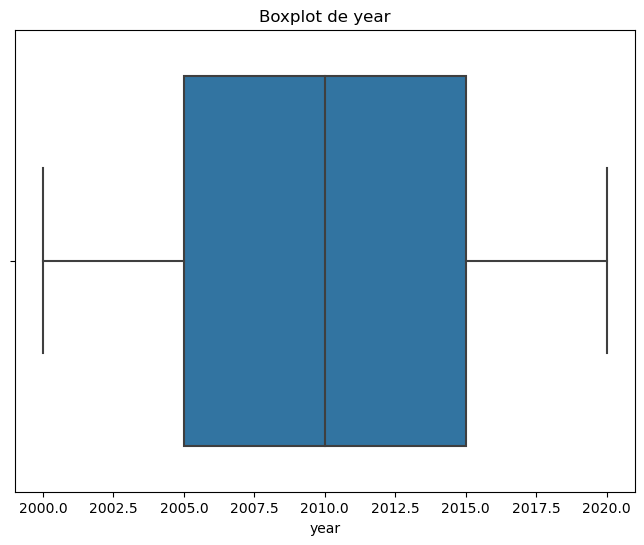

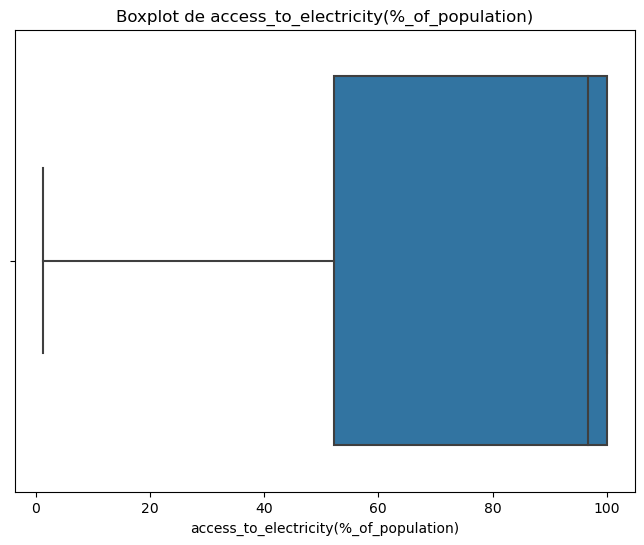

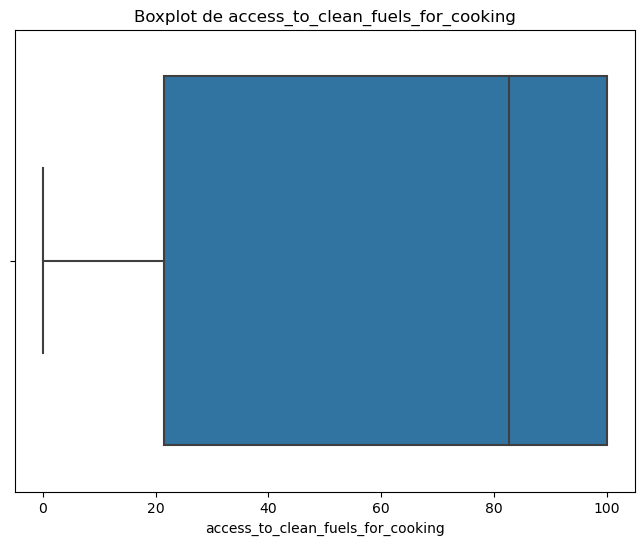

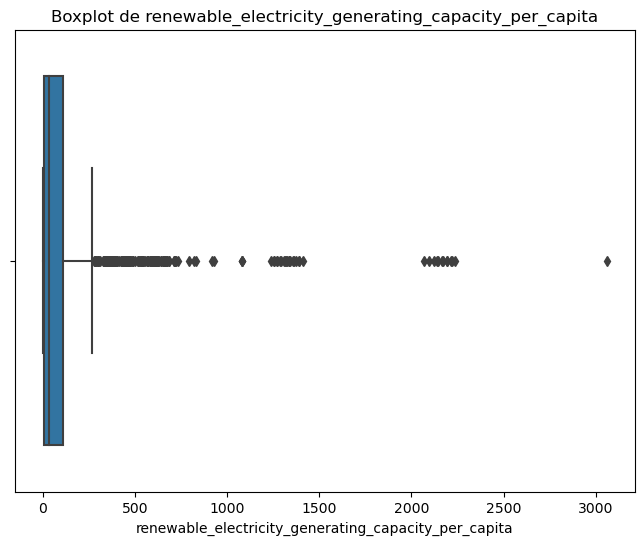

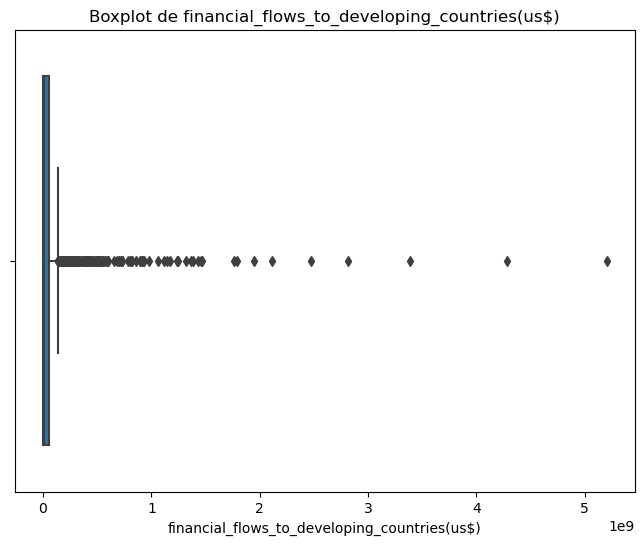

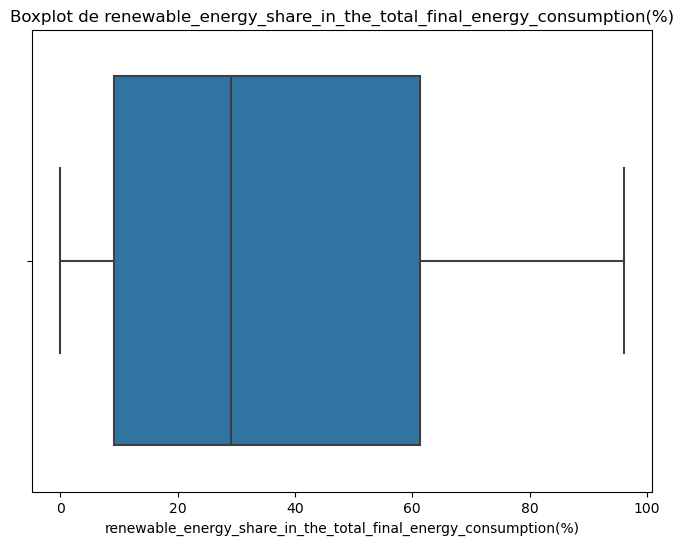

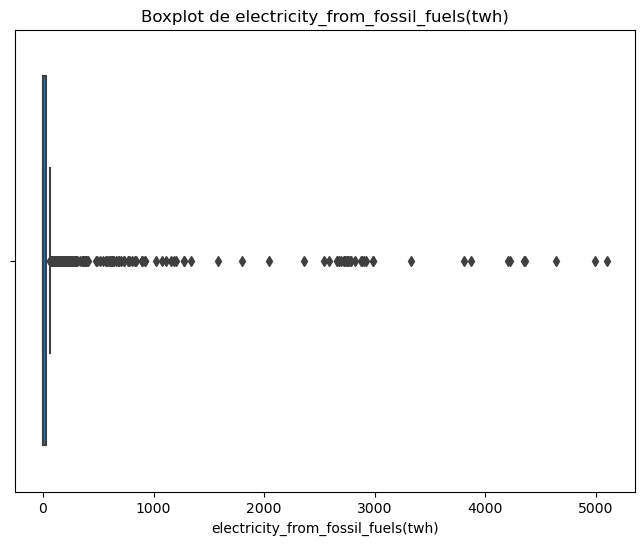

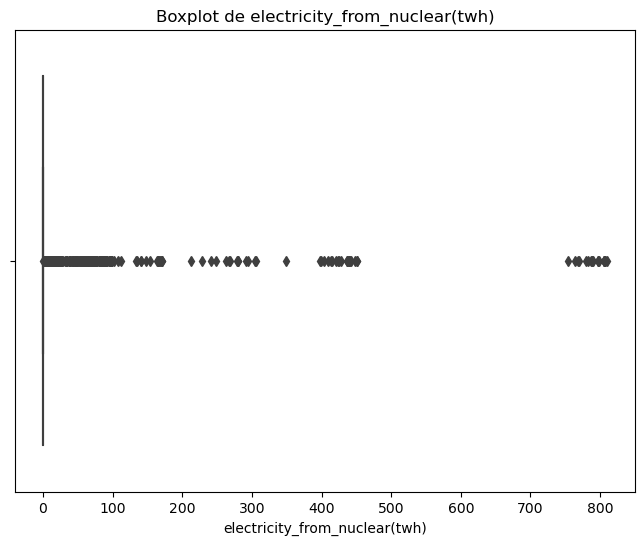

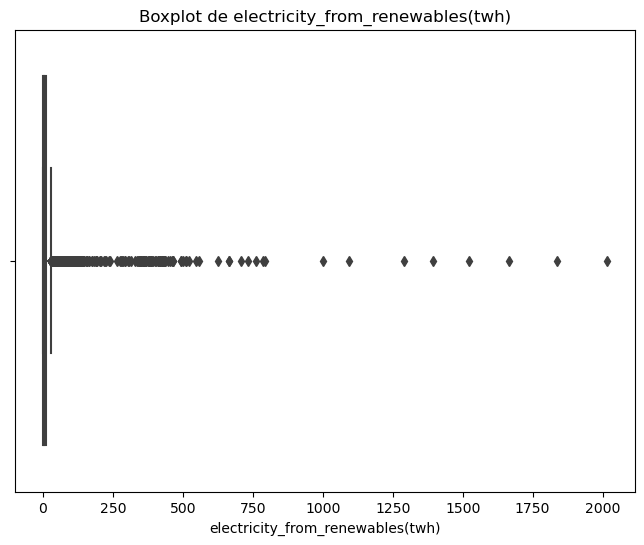

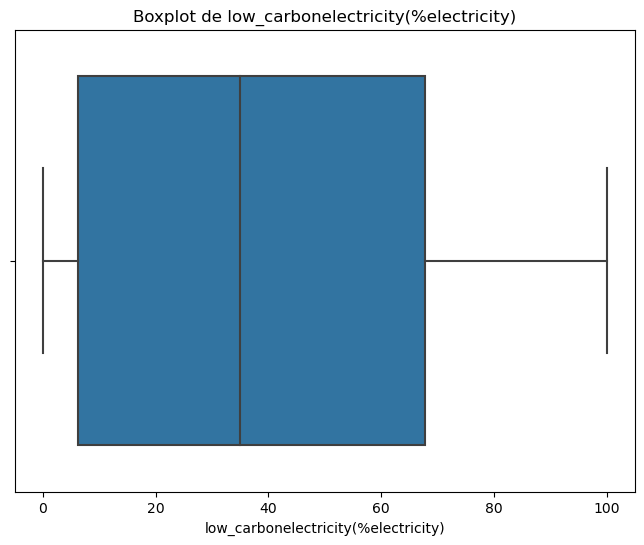

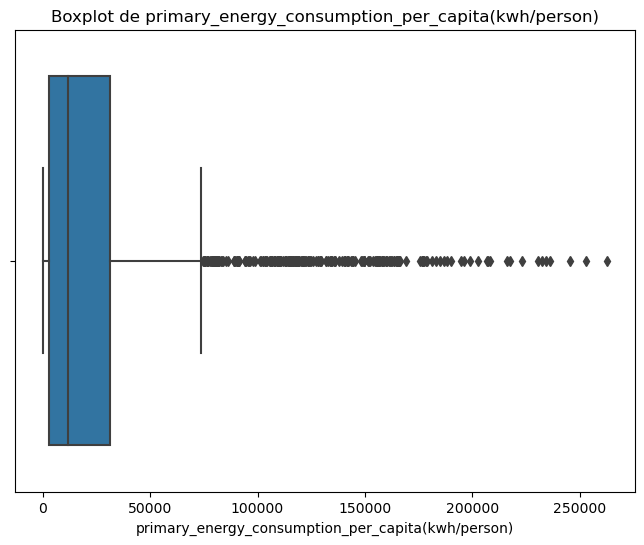

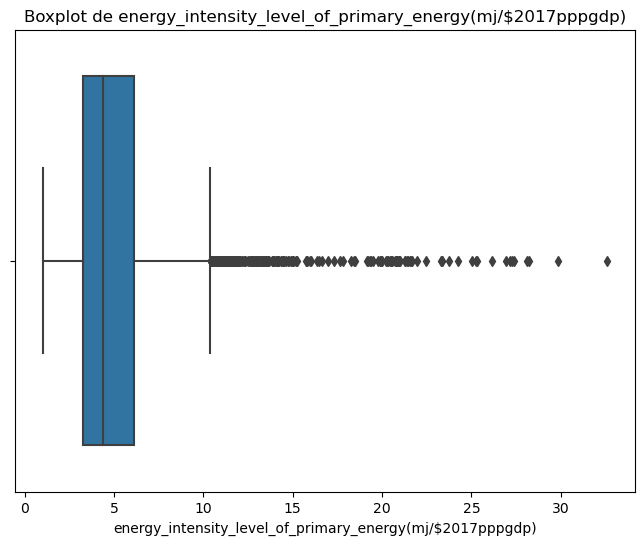

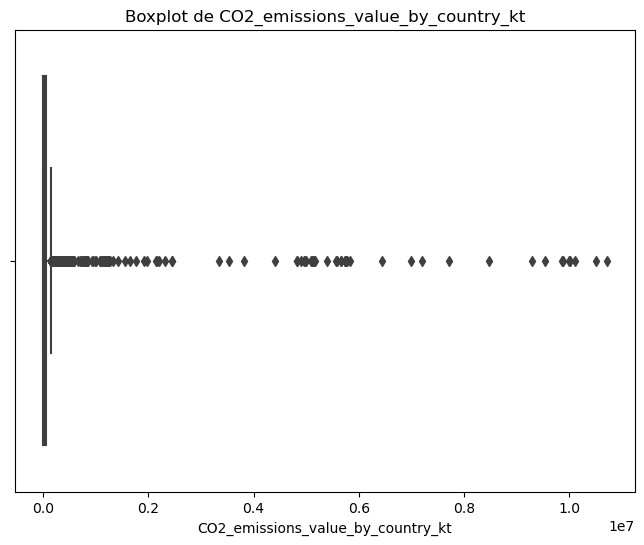

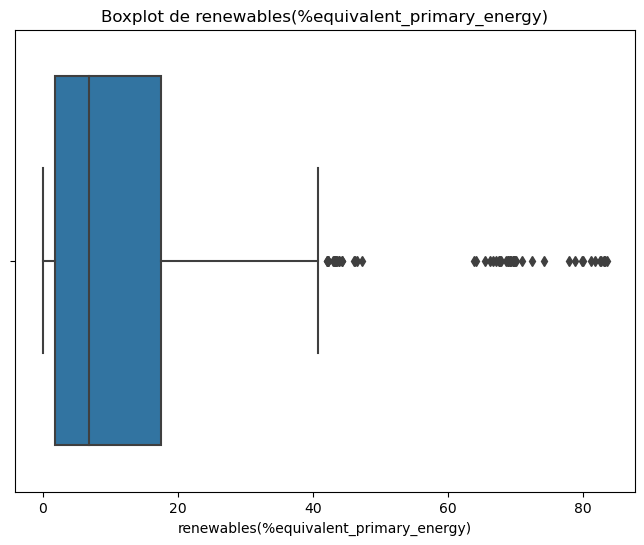

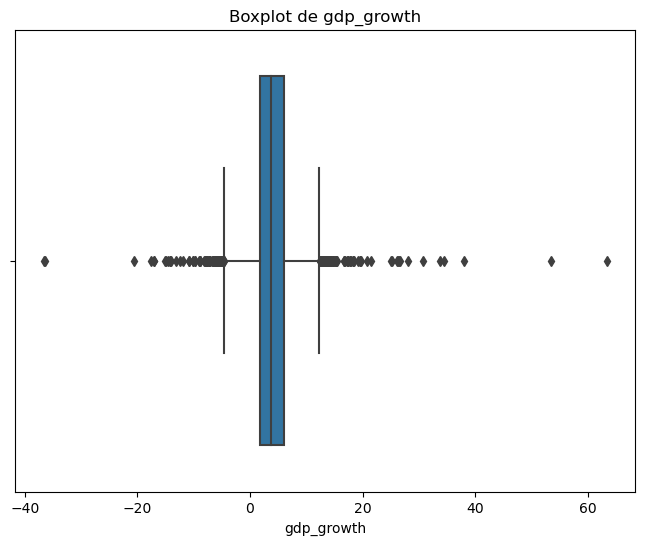

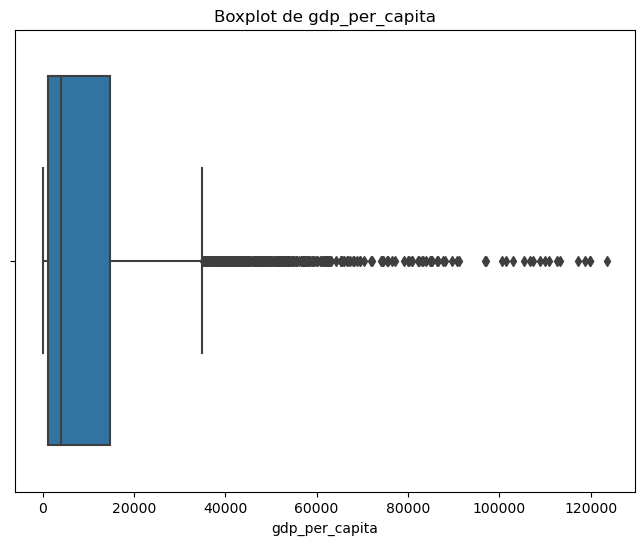

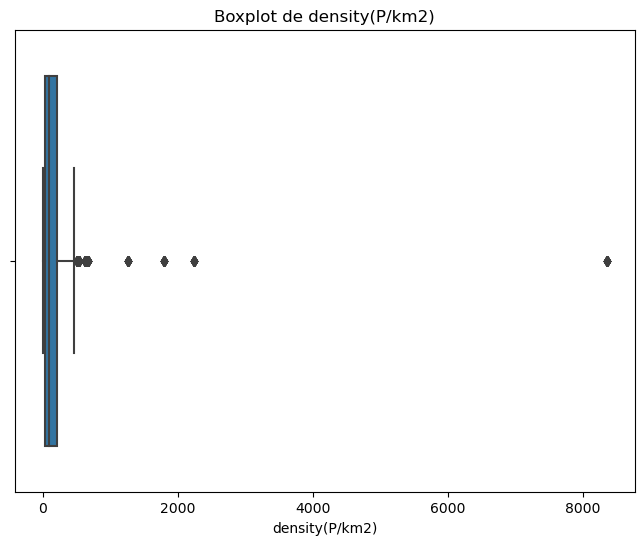

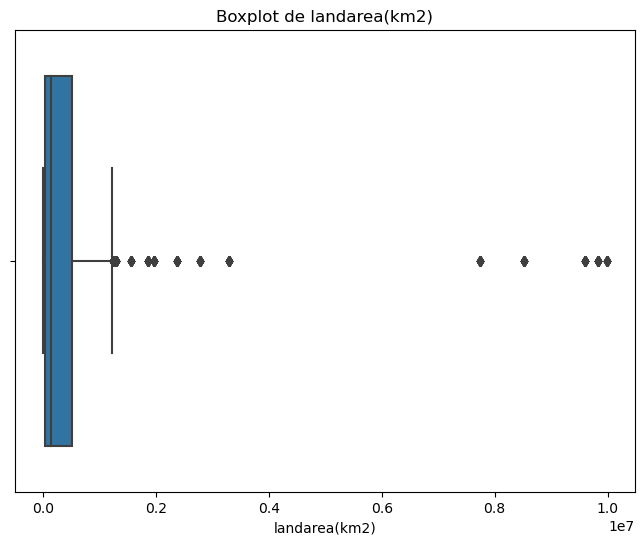

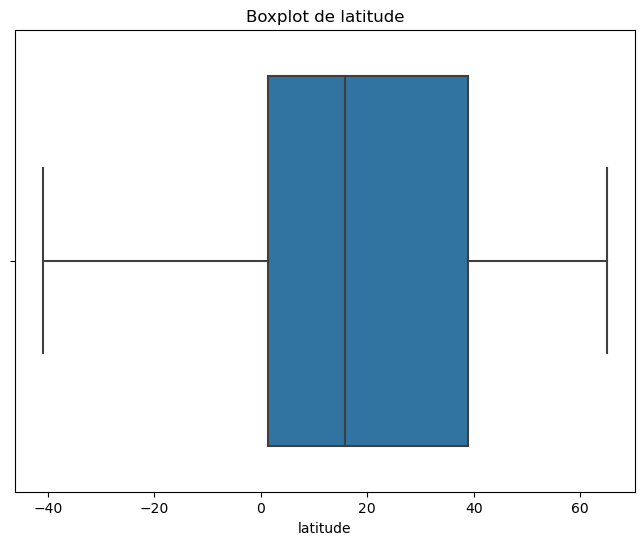

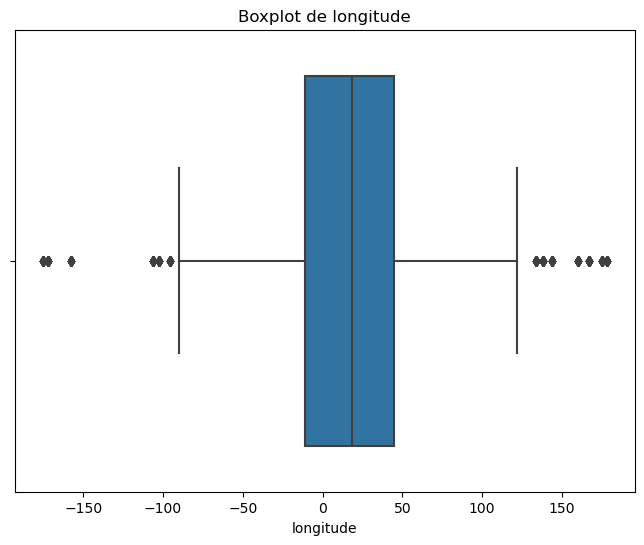

In [148]:
#CHECKING OUTLIERS
for col in df_num.columns:
    # Crea un nuevo subplot para cada gráfico
    fig, ax = plt.subplots(figsize=(8, 6))
    # Crea el gráfico de boxplot utilizando seaborn
    sns.boxplot(x=df[col], ax=ax)
    # Establece el título de cada gráfico
    ax.set_title('Boxplot de {}'.format(col))
    # Muestra cada gráfico
    plt.show()


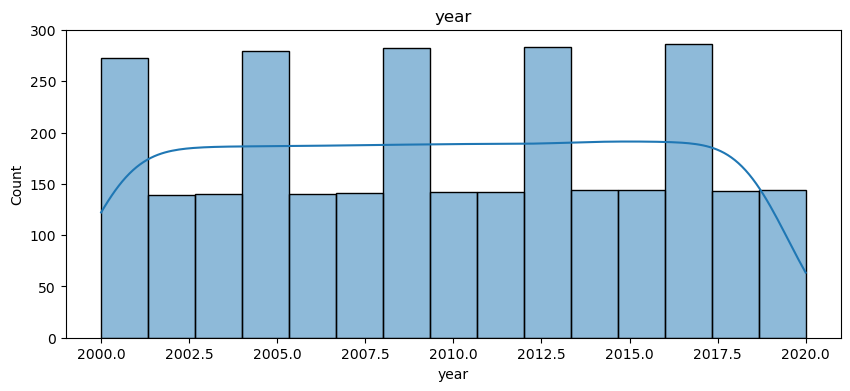

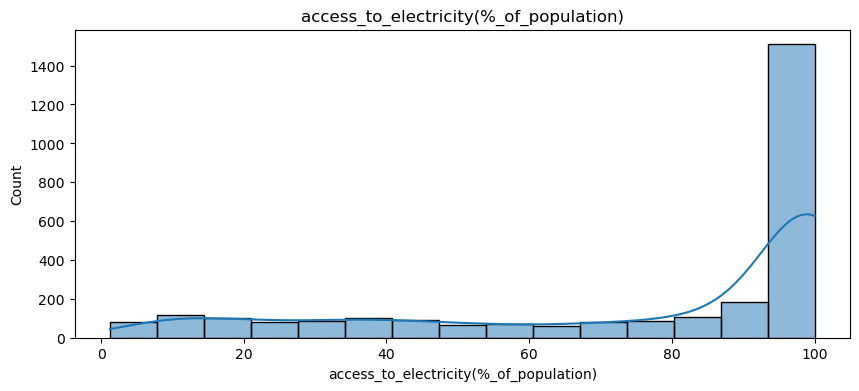

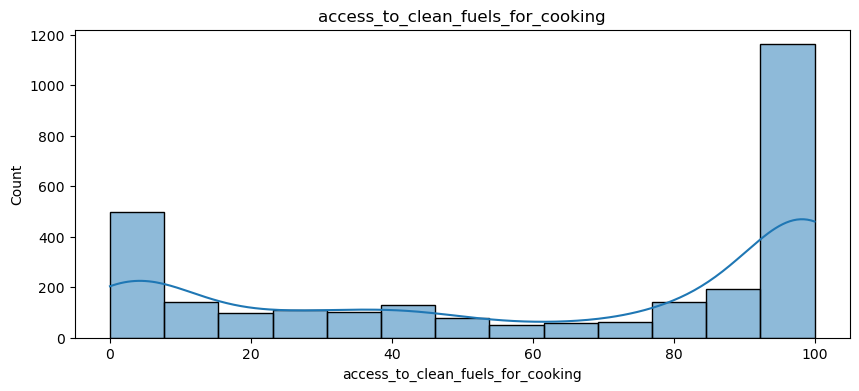

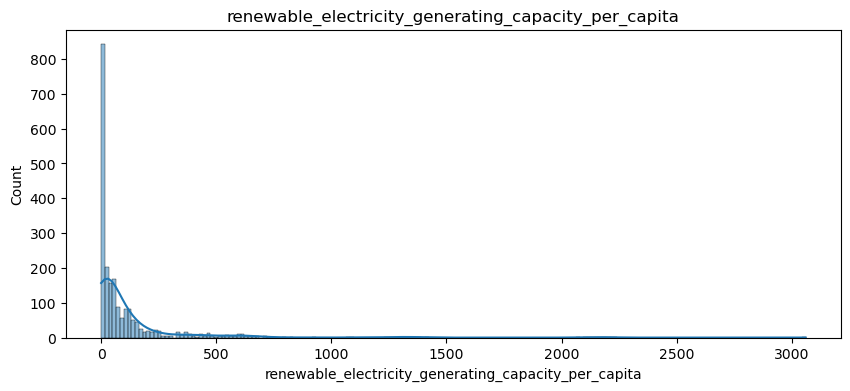

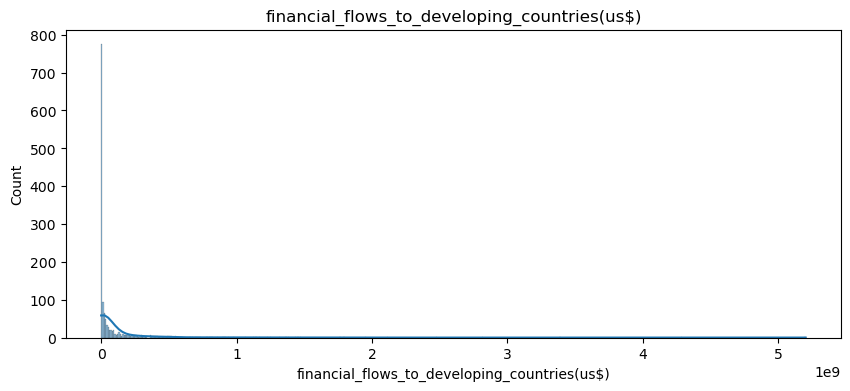

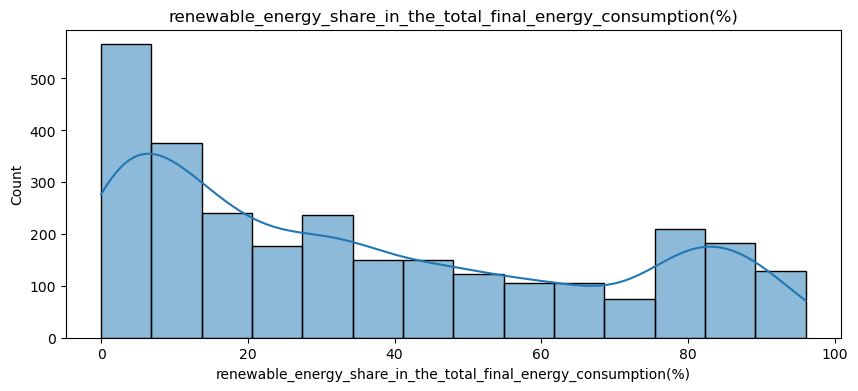

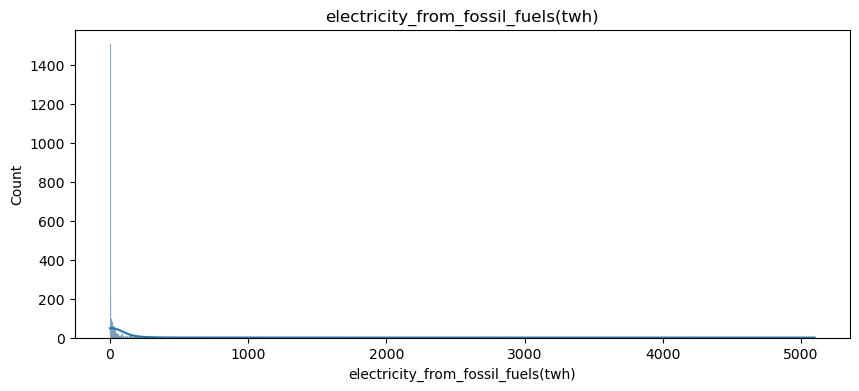

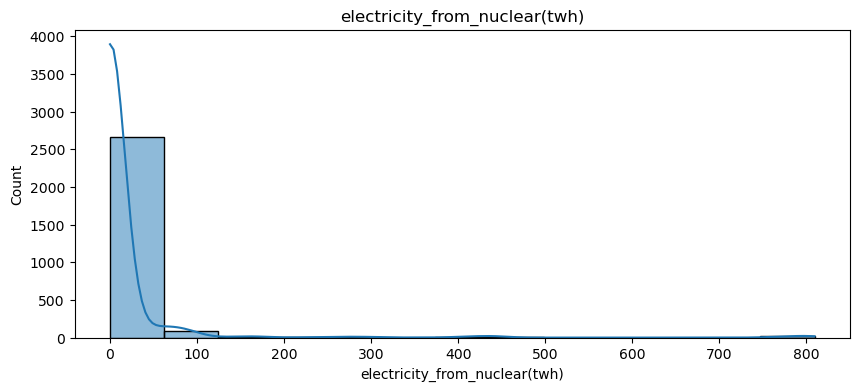

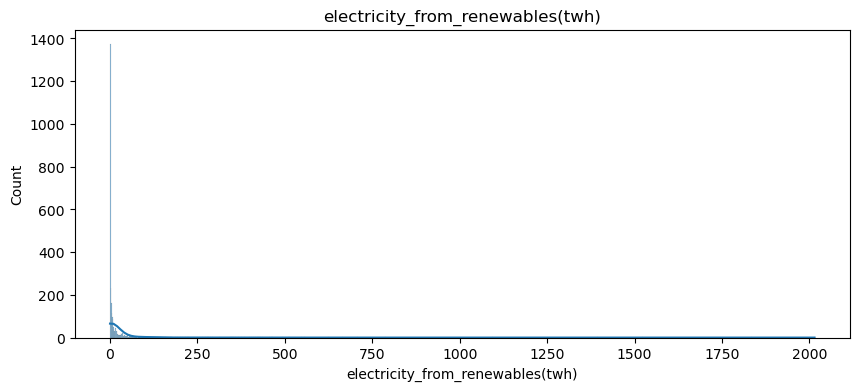

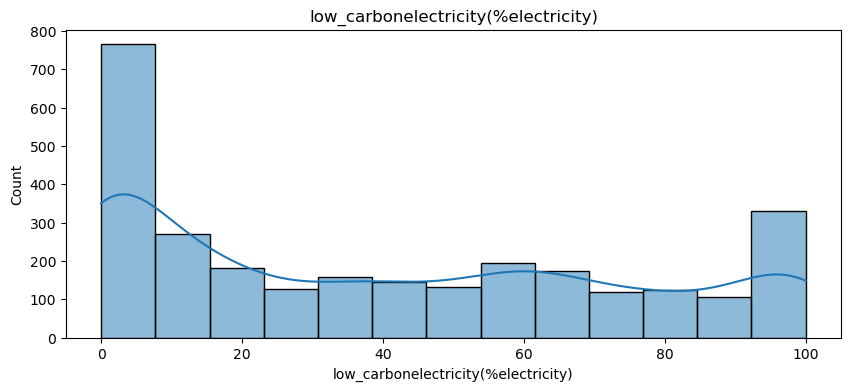

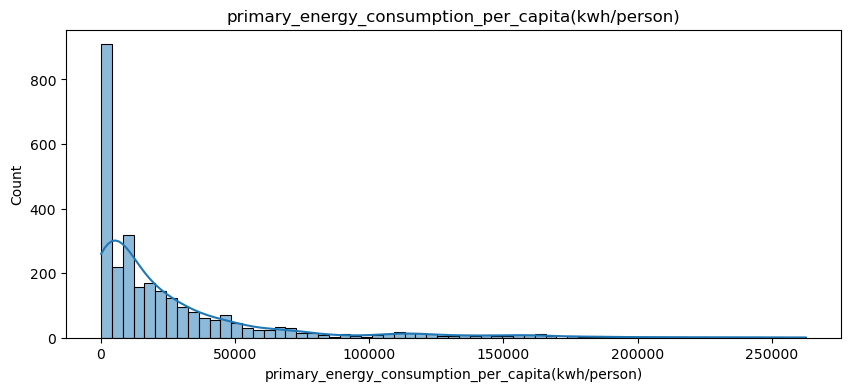

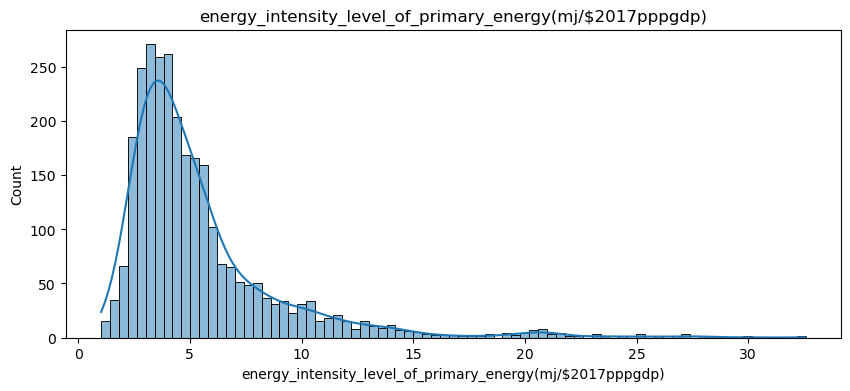

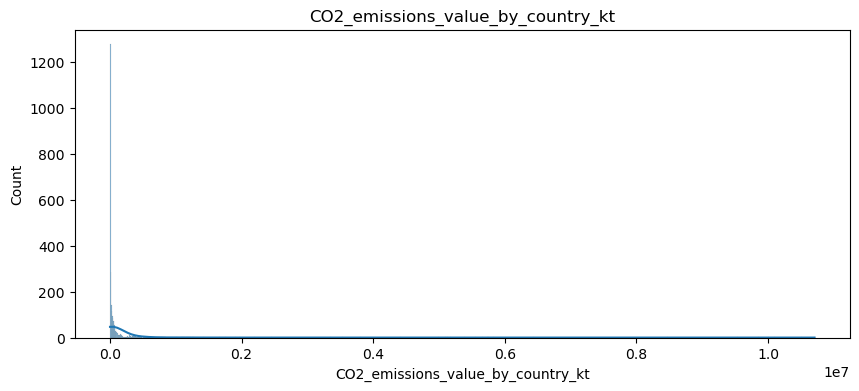

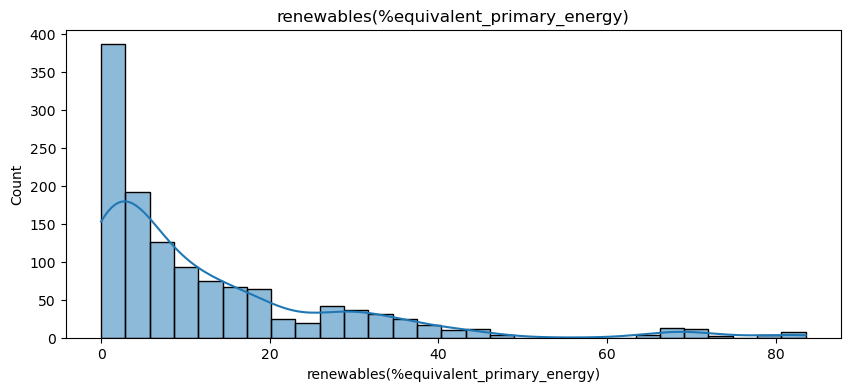

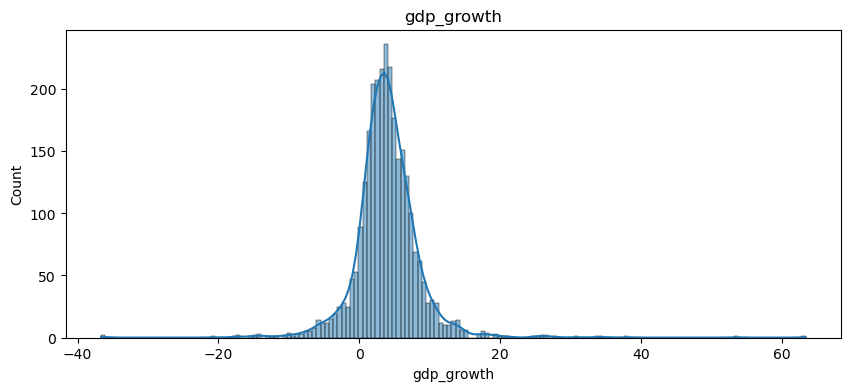

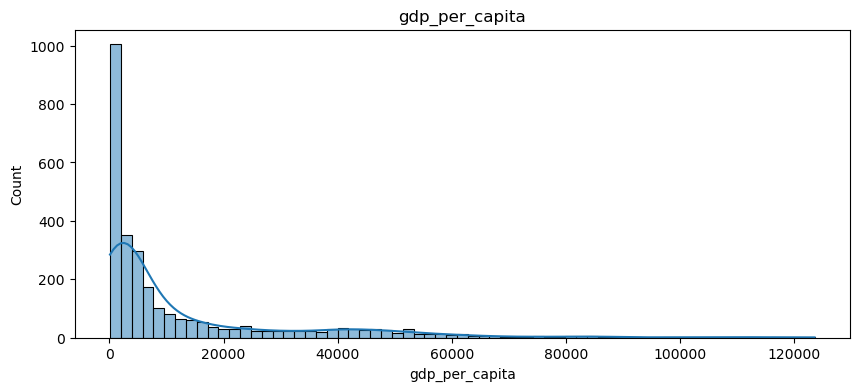

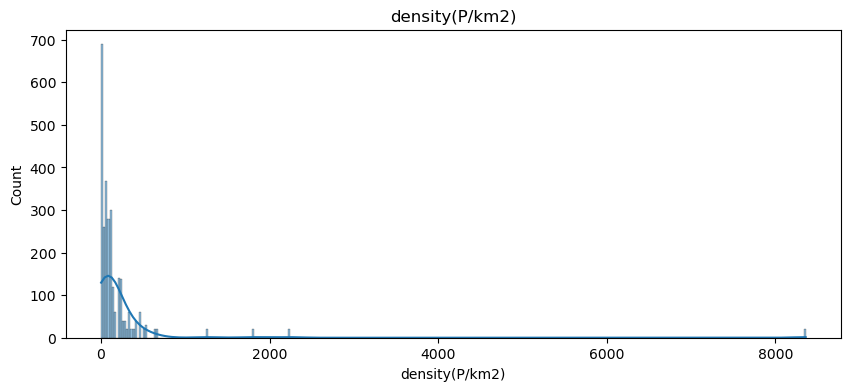

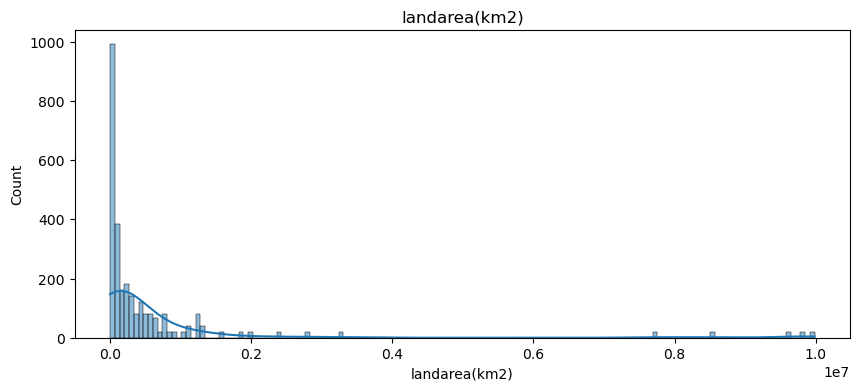

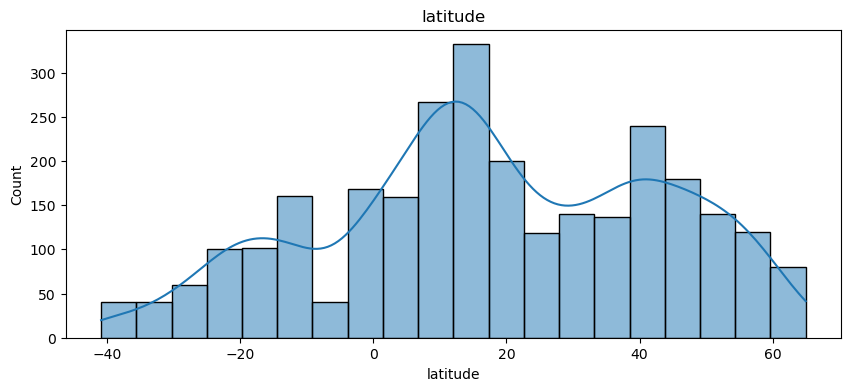

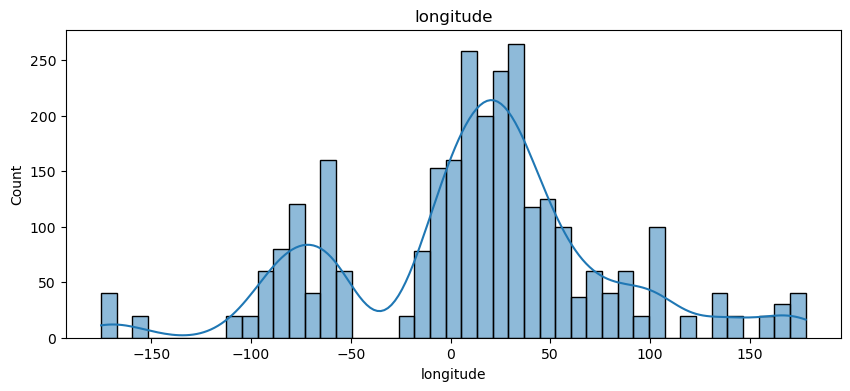

In [149]:
#cHECKING DISTRIBUTION 
for c in df_num.columns:
    plt.figure(figsize=(10,4))
    sns.histplot(df[c], kde= True)
    plt.title(c)
    plt.show()

In [150]:
#data aanalysis
df_num.describe()

year  access_to_electricity(%_of_population)  \
count  2823.000000                             2823.000000   
mean   2009.580234                               76.197582   
std       5.758781                               31.622540   
min    2000.000000                                1.252269   
25%    2005.000000                               52.150000   
50%    2010.000000                               96.696335   
75%    2015.000000                              100.000000   
max    2020.000000                              100.000000   

       access_to_clean_fuels_for_cooking  \
count                        2823.000000   
mean                           62.181013   
std                            39.487329   
min                             0.000000   
25%                            21.450000   
50%                            82.650000   
75%                           100.000000   
max                           100.000000   

       renewable_electricity_generating_capacity_per_capita  \
count                                        2103.000000      
mean                                          113.281398      
std                                           252.395591      
min                                             0.000000      
25%                                             5.180000      
50%                                            33.430000      
75%                                           110.470000      
max                                          3060.190000      

       financial_flows_to_developing_countries(us$)  \
count                                  1.375000e+03   
mean                                   9.347951e+07   
std                                    3.023606e+08   
min                                    0.000000e+00   
25%                                    2.850000e+05   
50%                                    6.000000e+06   
75%                                    5.441500e+07   
max                                    5.202310e+09   

       renewable_energy_share_in_the_total_final_energy_consumption(%)  \
count                                        2823.000000                 
mean                                           36.044215                 
std                                            30.142730                 
min                                             0.000000                 
25%                                             9.225000                 
50%                                            29.030000                 
75%                                            61.380000                 
max                                            96.040000                 

       electricity_from_fossil_fuels(twh)  electricity_from_nuclear(twh)  \
count                         2823.000000                    2823.000000   
mean                            78.790496                      15.581498   
std                            377.309949                      79.377678   
min                              0.000000                       0.000000   
25%                              0.280000                       0.000000   
50%                              3.050000                       0.000000   
75%                             26.845000                       0.000000   
max                           5098.220000                     809.410000   

       electricity_from_renewables(twh)  low_carbonelectricity(%electricity)  \
count                       2823.000000                          2823.000000   
mean                          27.344361                            39.773868   
std                          108.493052                            34.570402   
min                            0.000000                             0.000000   
25%                            0.090000                             6.182432   
50%                            1.700000                            34.862385   
75%                           11.095000                            67.767548   
ma

In [151]:
#Feature correlatiomn analysis

In [152]:
df_num.corr()

year  \
year                                                1.000000   
access_to_electricity(%_of_population)              0.124783   
access_to_clean_fuels_for_cooking                   0.059306   
renewable_electricity_generating_capacity_per_c...  0.087019   
financial_flows_to_developing_countries(us$)        0.143060   
renewable_energy_share_in_the_total_final_energ... -0.029353   
electricity_from_fossil_fuels(twh)                  0.031236   
electricity_from_nuclear(twh)                      -0.007005   
electricity_from_renewables(twh)                    0.075618   
low_carbonelectricity(%electricity)                 0.021490   
primary_energy_consumption_per_capita(kwh/person)   0.003540   
energy_intensity_level_of_primary_energy(mj/$20... -0.152314   
CO2_emissions_value_by_country_kt                   0.021691   
renewables(%equivalent_primary_energy)              0.091707   
gdp_growth                                         -0.104148   
gdp_per_capita                                      0.133550   
density(P/km2)                                     -0.000783   
landarea(km2)                                      -0.003413   
latitude                                           -0.006288   
longitude                                           0.008926   

                                                    access_to_electricity(%_of_population)  \
year                                                                              0.124783   
access_to_electricity(%_of_population)                                            1.000000   
access_to_clean_fuels_for_cooking                                                 0.879172   
renewable_electricity_generating_capacity_per_c...                                0.275870   
financial_flows_to_developing_countries(us$)                                      0.052090   
renewable_energy_share_in_the_total_final_energ...                               -0.785366   
electricity_from_fossil_fuels(twh)                                                0.139006   
electricity_from_nuclear(twh)                                                     0.145052   
electricity_from_renewables(twh)                                                  0.164635   
low_carbonelectricity(%electricity)                                              -0.158408   
primary_energy_consumption_per_capita(kwh/person)                                 0.462250   
energy_intensity_level_of_primary_energy(mj/$20...                               -0.262699   
CO2_emissions_value_by_country_kt                                                 0.137740   
renewables(%equivalent_primary_energy)                                            0.067967   
gdp_growth                                                                       -0.103794   
gdp_per_capita                                                                    0.447776   
density(P/km2)                                                                    0.092525   
landarea(km2)                                                                     0.084669   
latitude                                                                          0.443847   
longitude                                                                        -0.133828   

                                                    access_to_clean_fuels_for_cooking  \
year                                                                         0.059306   
access_to_electricity(%_of_population)                                       0.879172   
access_to_clean_fuels_for_cooking                                            1.000000   
renewable_electricity_generating_capacity_per_c...                           0.231085   
financial_flows_to_developing_countries(us$)                                 0.028979   
renewable_energy_share_in_the_total_final_energ...                          -0.796956   
electricity_from_fossil_fuels(twh)                                           0.104079   
electricity_from_nuclear

Text(0.0, 1.0, 'CORRELATIONS HEATMAP FOR NUMERICAL DATA')

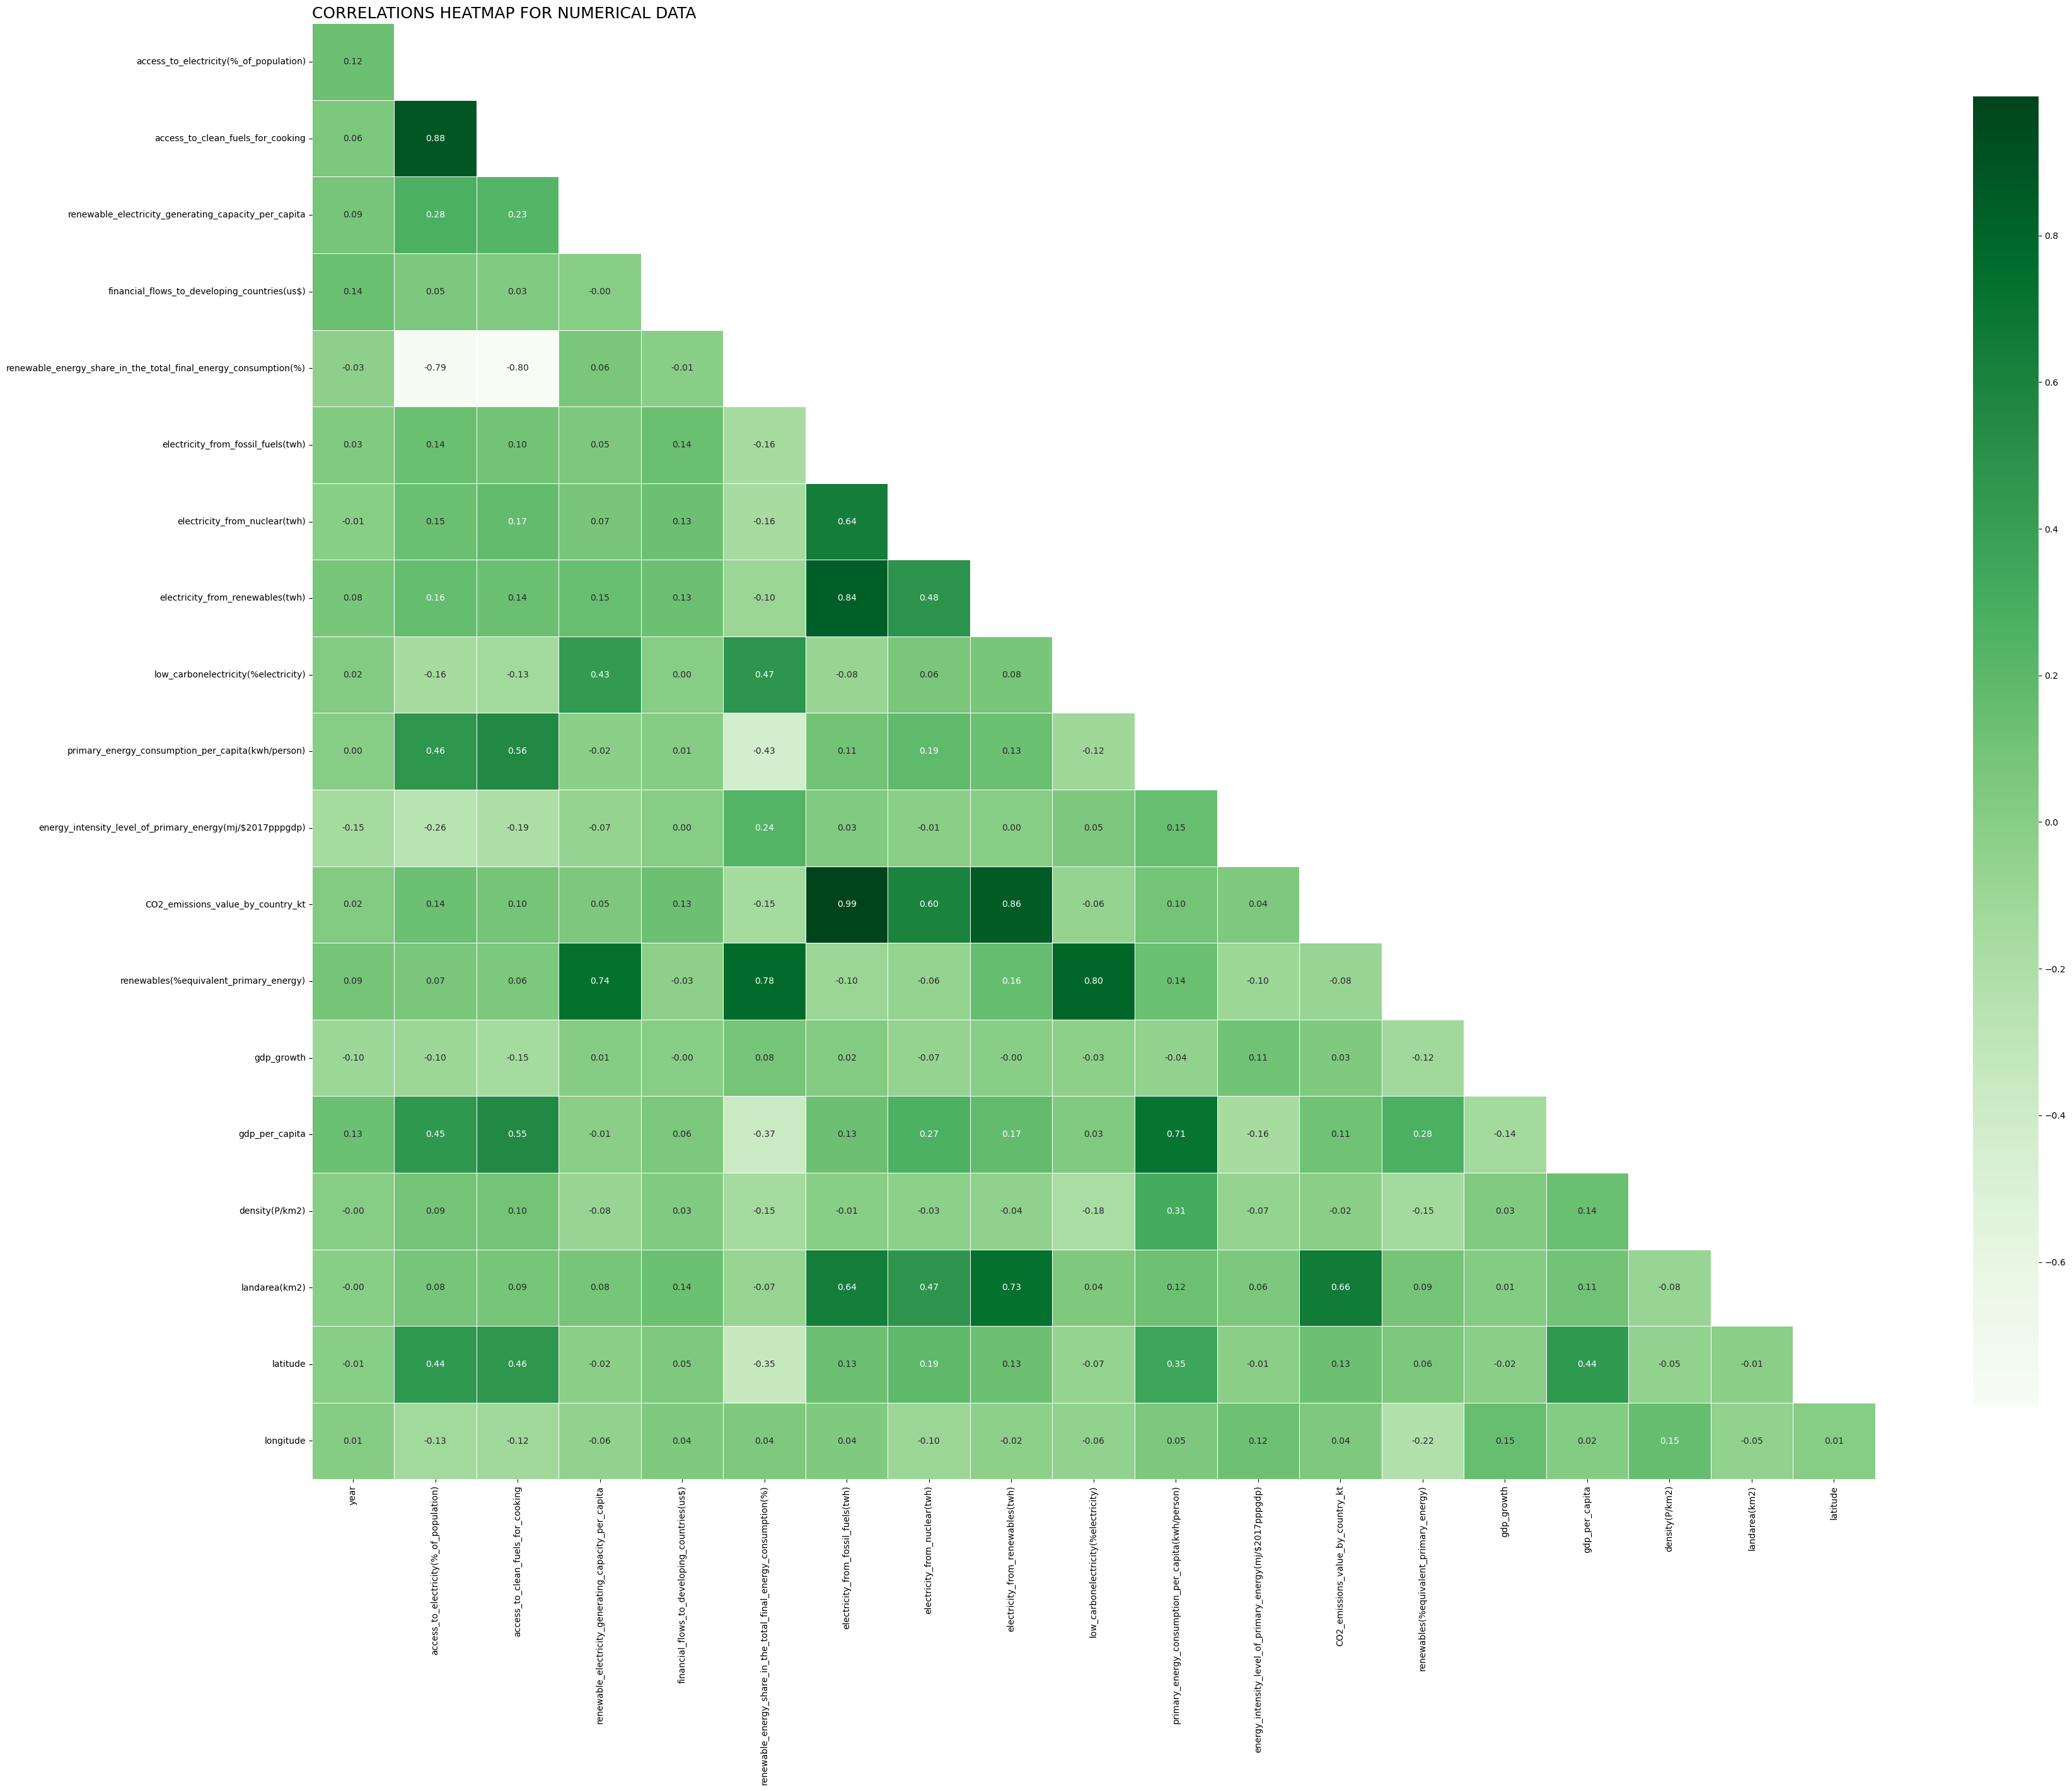

In [153]:
corr = df_num.corr()
ones = np.ones_like(corr, dtype="bool")
mask = np.triu(ones)
mask = mask[1:, :-1]
corr = corr.iloc[1:,:-1].copy()
fig, ax = plt.subplots(figsize=(40,30))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="Greens", linewidths=.6, cbar_kws={"shrink":.9})
ax.xaxis.tick_bottom()
plt.title("Correlations heatmap for numerical data".upper(), fontdict={"fontsize": 18}, loc="left")

In [154]:
#High correlation:.80 to 1
#Mean correlation:.60 to .80
#Low correlation: .40 to .60


In [155]:
corr = df_num.corr()
high_corr = corr[corr > 0.80]
high_corr = high_corr.unstack().dropna()
high_corr = high_corr[high_corr.index.get_level_values(0) != high_corr.index.get_level_values(1)]

for index, value in high_corr.items():
    variable_1, variable_2 = index
    correlation_value = value
    print("Variables:", variable_1, "and", variable_2)
    print("Correlation:", correlation_value)
    print("------------------------")

Variables: access_to_electricity(%_of_population) and access_to_clean_fuels_for_cooking
Correlation: 0.8791718649960442
------------------------
Variables: access_to_clean_fuels_for_cooking and access_to_electricity(%_of_population)
Correlation: 0.8791718649960442
------------------------
Variables: electricity_from_fossil_fuels(twh) and electricity_from_renewables(twh)
Correlation: 0.840268009768355
------------------------
Variables: electricity_from_fossil_fuels(twh) and CO2_emissions_value_by_country_kt
Correlation: 0.9898381470954191
------------------------
Variables: electricity_from_renewables(twh) and electricity_from_fossil_fuels(twh)
Correlation: 0.840268009768355
------------------------
Variables: electricity_from_renewables(twh) and CO2_emissions_value_by_country_kt
Correlation: 0.8572496297678435
------------------------
Variables: CO2_emissions_value_by_country_kt and electricity_from_fossil_fuels(twh)
Correlation: 0.9898381470954191
------------------------
Variables: 

Correlations Results

- Access to Electricity and Access to Clean Fuels for Cooking: The variables "access_to_electricity(%_of_population)" and "access_to_clean_fuels_for_cooking" have a very high correlation of approximately 0.879. This suggests a strong association between access to electricity and access to clean cooking fuels in the population. Regions or countries with access to electricity are likely to have access to cleaner cooking sources as well, which is positive from a sustainability and quality of life perspective.????

- Fossil Electricity and Renewable Electricity: The variables "electricity_from_fossil_fuels(twh)" and "electricity_from_renewables(twh)" have a correlation of approximately 0.840. This suggests that, in general, an increase in electricity generation from renewable sources is often accompanied by a decrease in electricity generation from fossil fuels. This positive correlation indicates a transition toward cleaner and renewable energy sources.?????

- Fossil Electricity and CO2 Emissions: The variables "electricity_from_fossil_fuels(twh)" and "CO2_emissions_value_by_country_kt)" have an extremely high correlation of approximately 0.990. This suggests a strong relationship between electricity generation from fossil fuels and carbon dioxide (CO2) emissions. As electricity generation from fossil fuels increases, CO2 emissions are likely to increase as well.

- Renewable Electricity and CO2 Emissions: The variables "electricity_from_renewables(twh)" and "CO2_emissions_value_by_country_kt)" have a correlation of approximately 0.857. This suggests that an increase in electricity generation from renewable sources is often associated with a decrease in CO2 emissions. This supports the idea that transitioning to renewable energy sources can contribute to reducing greenhouse gas emissions.???????

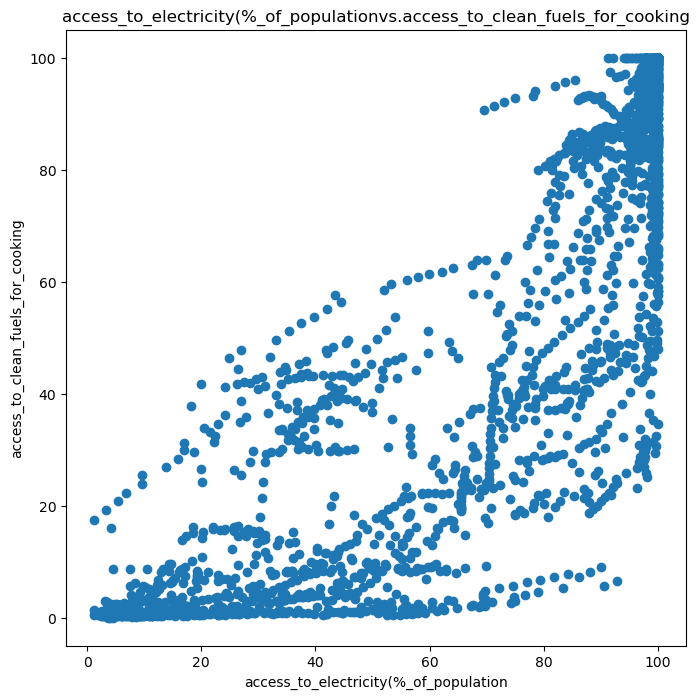

In [156]:
#Plot illustrating access_to_electricity(%_of_population) VS access_to_clean_fuels_for_cooking
plt.figure(figsize=(8, 8))
plt.scatter(df['access_to_electricity(%_of_population)'], df['access_to_clean_fuels_for_cooking'])
plt.title('access_to_electricity(%_of_population' "vs." 'access_to_clean_fuels_for_cooking')
plt.xlabel('access_to_electricity(%_of_population')
plt.ylabel('access_to_clean_fuels_for_cooking')
plt.show()

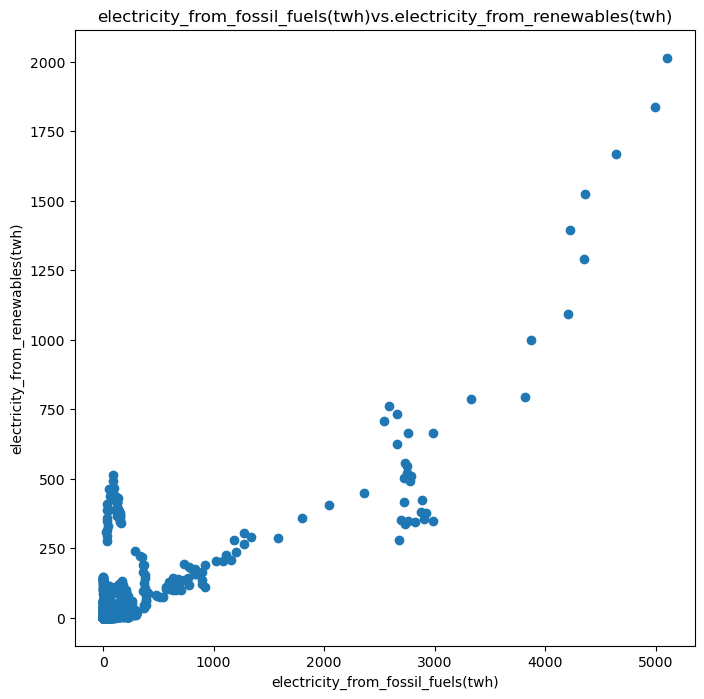

In [157]:
#Plot illustrating electricity_from_fossil_fuels(twh) vs electricity_from_renewables(twh)
plt.figure(figsize=(8, 8))
plt.scatter(df['electricity_from_fossil_fuels(twh)'], df['electricity_from_renewables(twh)'])
plt.title('electricity_from_fossil_fuels(twh)' "vs." 'electricity_from_renewables(twh)')
plt.xlabel('electricity_from_fossil_fuels(twh)')
plt.ylabel('electricity_from_renewables(twh)')
plt.show()

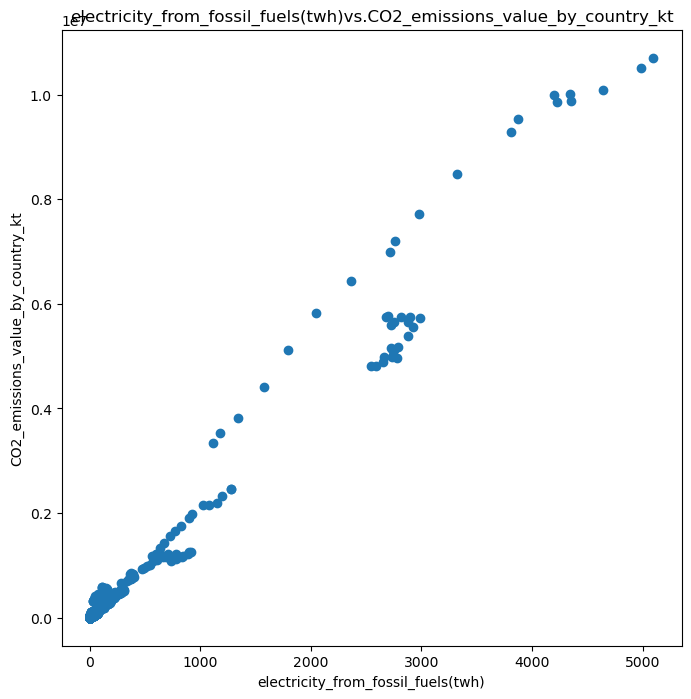

In [158]:
#Plot illustrating electricity_from_fossil_fuels(twh) vs CO2_emissions_value_by_country_kt)
plt.figure(figsize=(8, 8))
plt.scatter(df['electricity_from_fossil_fuels(twh)'], df['CO2_emissions_value_by_country_kt'])
plt.title('electricity_from_fossil_fuels(twh)' "vs." 'CO2_emissions_value_by_country_kt')
plt.xlabel('electricity_from_fossil_fuels(twh)')
plt.ylabel('CO2_emissions_value_by_country_kt')
plt.show()

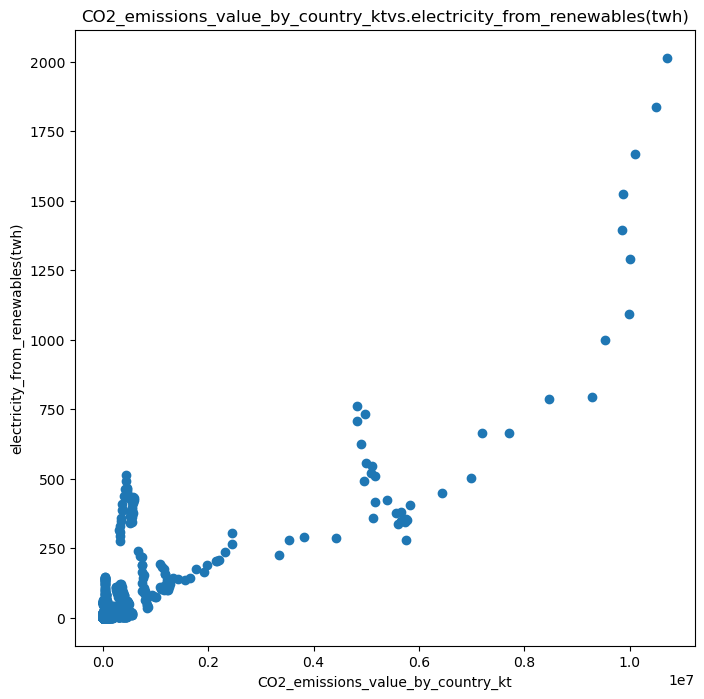

In [159]:
#Plot illustrating CO2_emissions_value_by_country_kt) vs electricity_from_renewables(twh)
plt.figure(figsize=(8, 8))
plt.scatter(df['CO2_emissions_value_by_country_kt'], df['electricity_from_renewables(twh)'])
plt.title('CO2_emissions_value_by_country_kt' "vs." 'electricity_from_renewables(twh)')
plt.xlabel('CO2_emissions_value_by_country_kt')
plt.ylabel('electricity_from_renewables(twh)')
plt.show()

In [160]:
#Drop irrelevant columns 
columnas_a_eliminar = ['latitude', 'longitude']
df = df.drop(columnas_a_eliminar, axis=1)
df

entity  year  access_to_electricity(%_of_population)  \
1     Afghanistan  2003                               14.738506   
2     Afghanistan  2004                               20.064968   
3     Afghanistan  2005                               25.390894   
4     Afghanistan  2006                               30.718690   
5     Afghanistan  2007                               36.051010   
...           ...   ...                                     ...   
2943     Zimbabwe  2016                               42.561730   
2944     Zimbabwe  2017                               44.178635   
2945     Zimbabwe  2018                               45.572647   
2946     Zimbabwe  2019                               46.781475   
2947     Zimbabwe  2020                               52.747670   

      access_to_clean_fuels_for_cooking  \
1                                  9.50   
2                                 10.90   
3                                 12.20   
4                                 13.85   
5                                 15.30   
...                                 ...   
2943                              29.80   
2944                              29.80   
2945                              29.90   
2946                              30.10   
2947                              30.40   

      renewable_electricity_generating_capacity_per_capita  \
1                                                  8.09      
2                                                  7.75      
3                                                  7.51      
4                                                  7.40      
5                                                  7.25      
...                                                 ...      
2943                                              62.88      
2944                                              62.33      
2945                                              82.53      
2946                                              81.40      
2947                                              80.61      

      financial_flows_to_developing_countries(us$)  \
1                                       25970000.0   
2                                              NaN   
3                                        9830000.0   
4                                       10620000.0   
5                                       15750000.0   
...                                            ...   
2943                                       30000.0   
2944                                     5570000.0   
2945                                       10000.0   
2946                                      250000.0   
2947                                       30000.0   

      renewable_energy_share_in_the_total_final_energy_consumption(%)  \
1                                                 36.66                 
2                                                 44.24                 
3                                                 33.88                 
4                                                 31.89                 
5                                                 28.78                 
...                                                 ...                 
2943                                              81.90                 
2944                                              82.46                 
2945                                              80.23                 
2946                                              81.50                 
2947                                              81.90                 

      electricity_from_fossil_fuels(twh)  electricity_from_nuclear(twh)  \
1                                   0.31                            0.0   
2                                   0.33                            0.0   
3                                   0.34                            0.0   
4                                   0.20                            0.0   
5                                   0.20   

#ENERGY CONSUMPTION

In [161]:
# Function to plot features on world map
def plot_world_map(column_name):
    fig = go.Figure()
    for year in range(2000, 2021):
        # Filter the data for the current year
        filtered_df = df[df['year'] == year]

        # Create a choropleth trace for the current year
        trace = go.Choropleth(
            locations=filtered_df['entity'],
            z=filtered_df[column_name],
            locationmode='country names',
            colorscale='Electric',  # Use a different color scale for better contrast
            colorbar=dict(title=column_name),
            zmin=df[column_name].min(),
            zmax=df[column_name].max(),
            visible=False  # Set the trace to invisible initially
        )

        # Add the trace to the figure
        fig.add_trace(trace)

    # Set the first trace to visible
    fig.data[0].visible = True

    # Create animation steps
    steps = []
    for i in range(len(fig.data)):
        step = dict(
            method='update',
            args=[{'visible': [False] * len(fig.data)},  # Set all traces to invisible
                  {'title_text': f'{column_name} Map - {2000 + i}', 'frame': {'duration': 1000, 'redraw': True}}],
            label=str(2000 + i)  # Set the label for each step
        )
        step['args'][0]['visible'][i] = True  # Set the current trace to visible
        steps.append(step)

    # Create the slider
    sliders = [dict(
        active=0,
        steps=steps,
        currentvalue={"prefix": "Year: ", "font": {"size": 14}},  # Increase font size for slider label
    )]

    # Update the layout of the figure with increased size and change the template
    fig.update_layout(
        title_text=f'{column_name}',  # Set the initial title
        title_font_size=24,  # Increase title font size
        title_x=0.5,  # Center the title
        geo=dict(
            showframe=True,
            showcoastlines=True,
            projection_type='natural earth'
        ),
        sliders=sliders,
        height=500,  # Set the height of the figure in pixels
        width=1000,  # Set the width of the figure in pixels
        font=dict(family='Arial', size=12),  # Customize font family and size for the whole figure
        margin=dict(t=80, l=50, r=50, b=50),  # Add margin for better layout spacing
        template='plotly_dark',  # Change the template to 'plotly_dark'
    )

    # Show the figure
    fig.show()

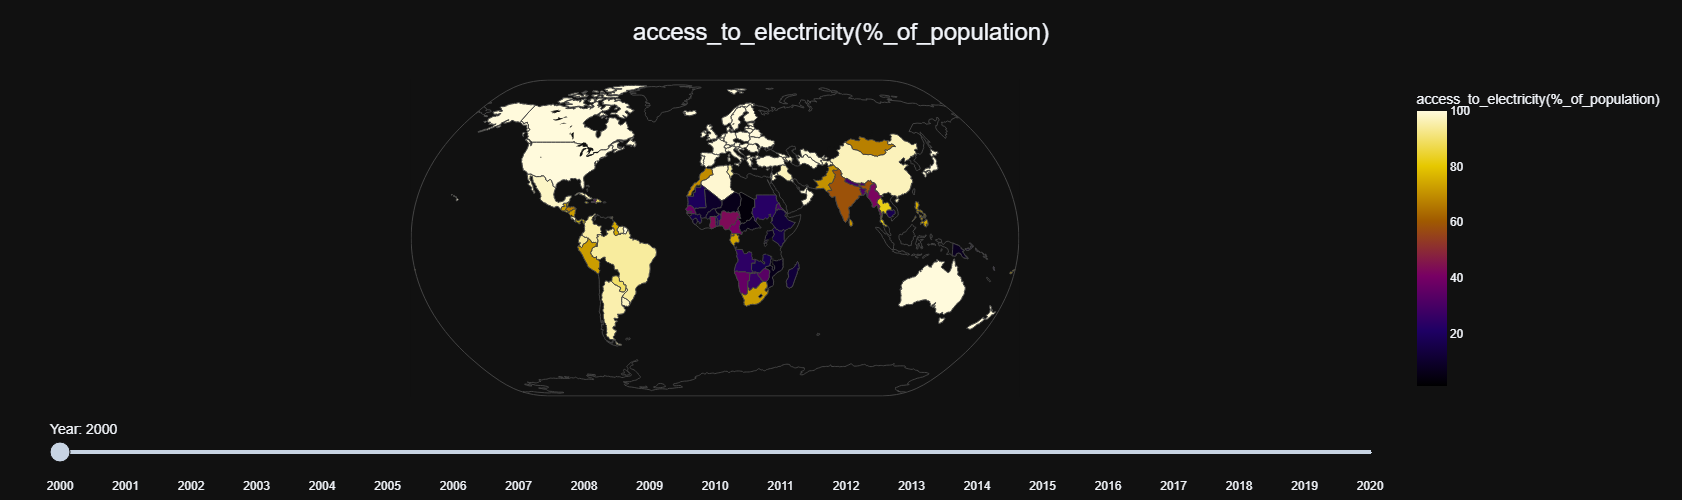

In [162]:
column_name = 'access_to_electricity(%_of_population)'
plot_world_map(column_name)

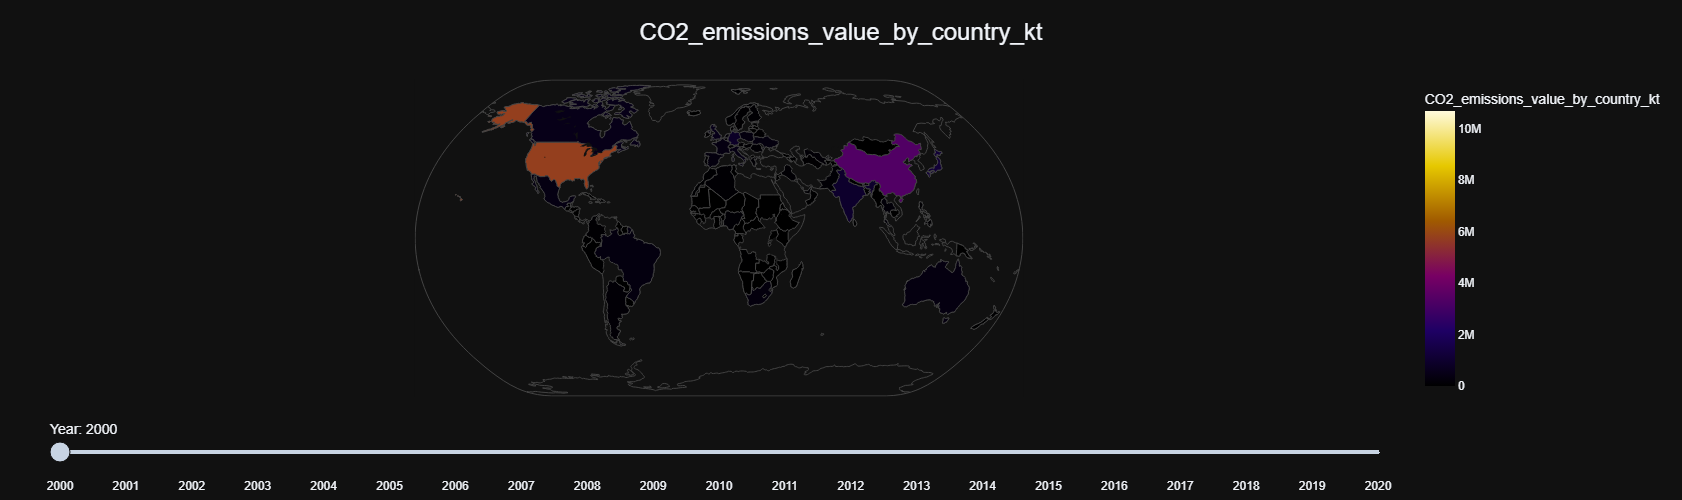

In [163]:
column_name = 'CO2_emissions_value_by_country_kt'
plot_world_map(column_name)

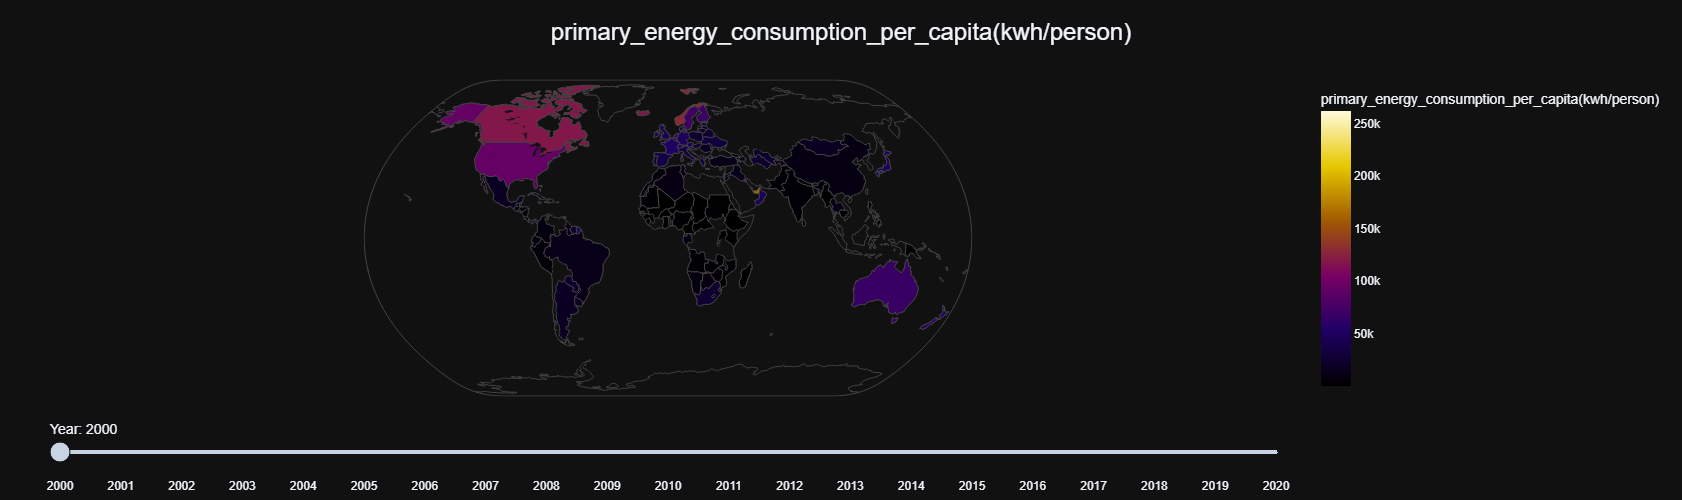

In [164]:
column_name = 'primary_energy_consumption_per_capita(kwh/person)'
plot_world_map(column_name)

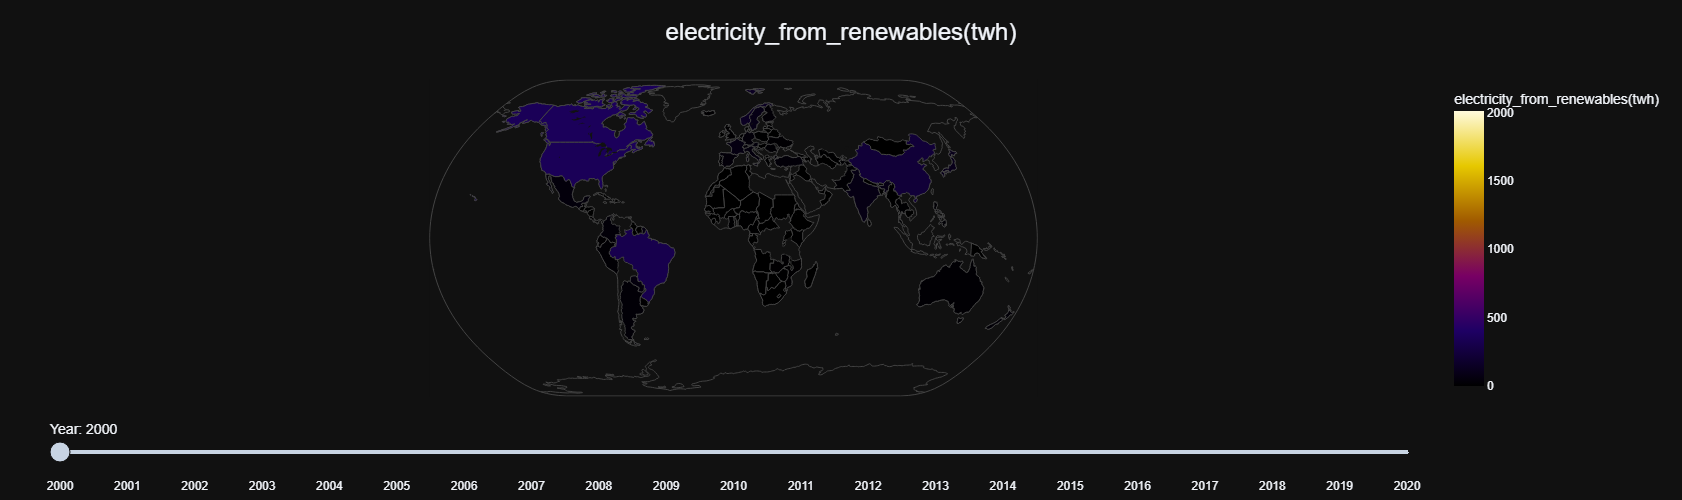

In [165]:
column_name = 'electricity_from_renewables(twh)'
plot_world_map(column_name)   #no aprece nada en Europa y Africa 

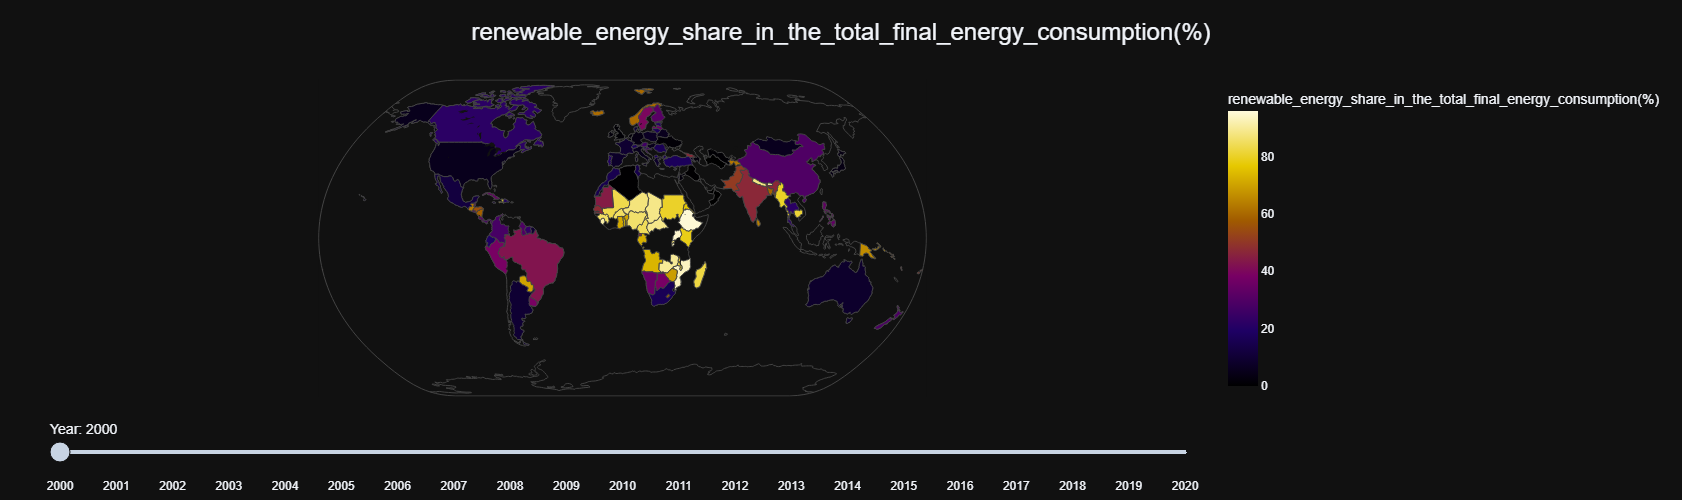

In [166]:
column_name = 'renewable_energy_share_in_the_total_final_energy_consumption(%)'
plot_world_map(column_name)

Text(0, 0.5, 'Renewable Share (%)')

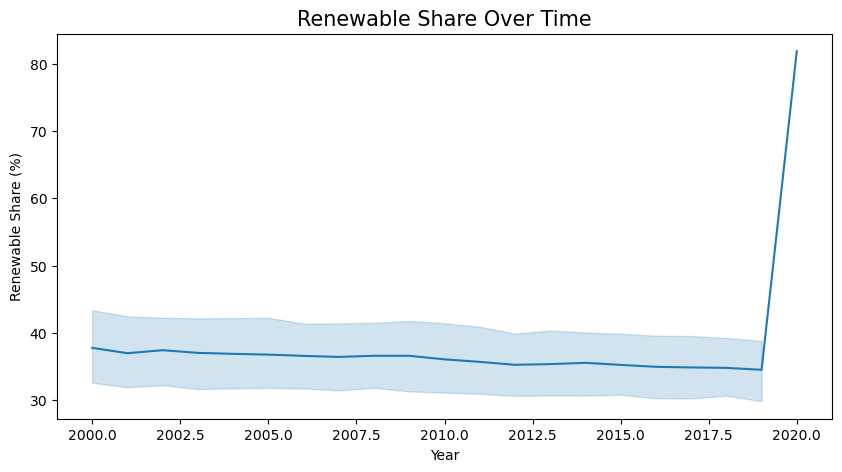

In [167]:
plt.figure(figsize=(10,5))
sns.lineplot(x='year', y='renewable_energy_share_in_the_total_final_energy_consumption(%)', data=df)
plt.title('Renewable Share Over Time', size=15)
plt.xlabel('Year')
plt.ylabel('Renewable Share (%)')

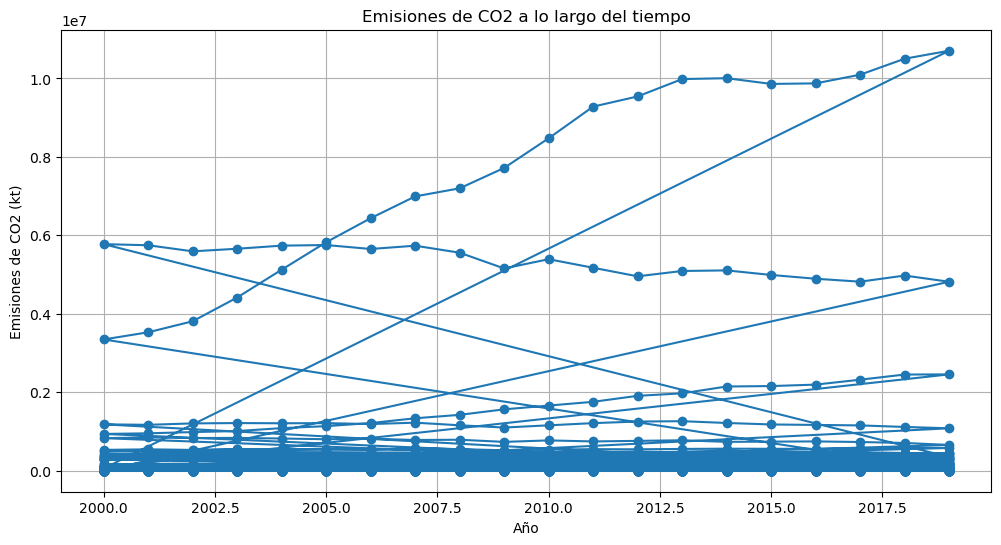

In [168]:
# Gráfico de líneas para emisiones de CO2 a lo largo del tiempo

plt.figure(figsize=(12, 6))
plt.plot(df['year'], df['CO2_emissions_value_by_country_kt'], marker='o', linestyle='-')
plt.title('Emisiones de CO2 a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Emisiones de CO2 (kt)')
plt.grid(True)
plt.show()

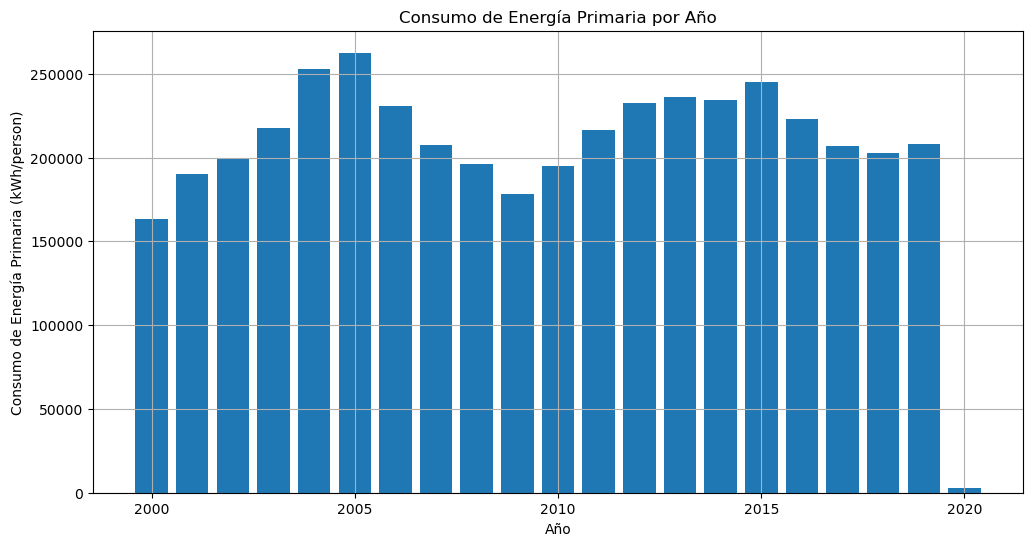

In [169]:
#Gráfico de barras para el consumo de energía por año:
plt.figure(figsize=(12, 6))
plt.bar(df['year'], df['primary_energy_consumption_per_capita(kwh/person)'])
plt.title('Consumo de Energía Primaria por Año')
plt.xlabel('Año')
plt.ylabel('Consumo de Energía Primaria (kWh/person)')
plt.grid(True)
plt.show()

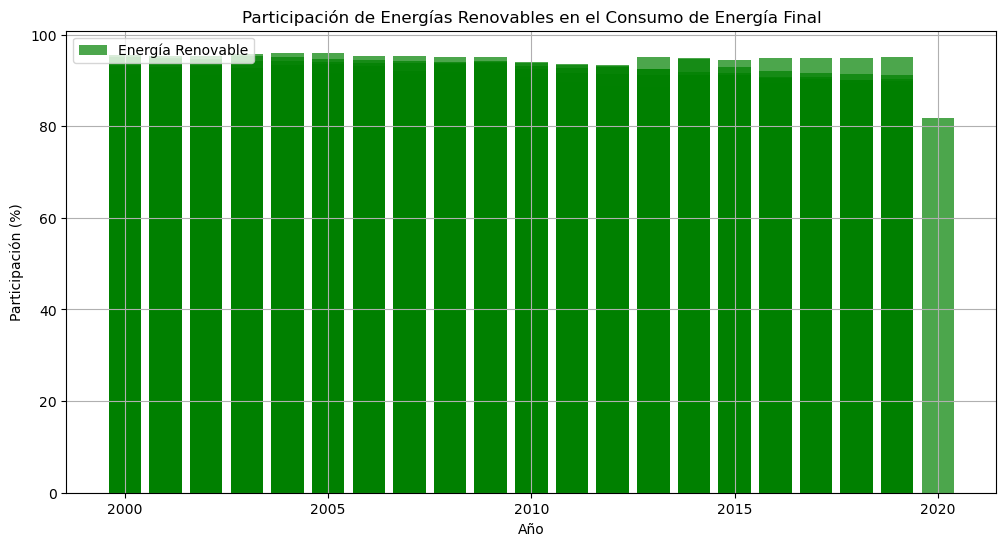

In [170]:
# Gráfico de áreas para la participación de energías renovables en el consumo final de energía:
years = df['year']
renewable_share = df['renewable_energy_share_in_the_total_final_energy_consumption(%)']
fossil_share = 100 - renewable_share  # Complemento de la participación renovable



plt.figure(figsize=(12, 6))
# Gráfico de barras para la participación de energías renovables
plt.bar(years, renewable_share, label='Energía Renovable', alpha=0.7, color='green')

plt.title('Participación de Energías Renovables en el Consumo de Energía Final')
plt.xlabel('Año')
plt.ylabel('Participación (%)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [171]:
df

entity  year  access_to_electricity(%_of_population)  \
1     Afghanistan  2003                               14.738506   
2     Afghanistan  2004                               20.064968   
3     Afghanistan  2005                               25.390894   
4     Afghanistan  2006                               30.718690   
5     Afghanistan  2007                               36.051010   
...           ...   ...                                     ...   
2943     Zimbabwe  2016                               42.561730   
2944     Zimbabwe  2017                               44.178635   
2945     Zimbabwe  2018                               45.572647   
2946     Zimbabwe  2019                               46.781475   
2947     Zimbabwe  2020                               52.747670   

      access_to_clean_fuels_for_cooking  \
1                                  9.50   
2                                 10.90   
3                                 12.20   
4                                 13.85   
5                                 15.30   
...                                 ...   
2943                              29.80   
2944                              29.80   
2945                              29.90   
2946                              30.10   
2947                              30.40   

      renewable_electricity_generating_capacity_per_capita  \
1                                                  8.09      
2                                                  7.75      
3                                                  7.51      
4                                                  7.40      
5                                                  7.25      
...                                                 ...      
2943                                              62.88      
2944                                              62.33      
2945                                              82.53      
2946                                              81.40      
2947                                              80.61      

      financial_flows_to_developing_countries(us$)  \
1                                       25970000.0   
2                                              NaN   
3                                        9830000.0   
4                                       10620000.0   
5                                       15750000.0   
...                                            ...   
2943                                       30000.0   
2944                                     5570000.0   
2945                                       10000.0   
2946                                      250000.0   
2947                                       30000.0   

      renewable_energy_share_in_the_total_final_energy_consumption(%)  \
1                                                 36.66                 
2                                                 44.24                 
3                                                 33.88                 
4                                                 31.89                 
5                                                 28.78                 
...                                                 ...                 
2943                                              81.90                 
2944                                              82.46                 
2945                                              80.23                 
2946                                              81.50                 
2947                                              81.90                 

      electricity_from_fossil_fuels(twh)  electricity_from_nuclear(twh)  \
1                                   0.31                            0.0   
2                                   0.33                            0.0   
3                                   0.34                            0.0   
4                                   0.20                            0.0   
5                                   0.20   

# 10 PAISES MAS CONTAMINANTES VS 10 MENOS CONTAMINANTES

In [172]:
co2_emissions_by_country = df.groupby("entity")["CO2_emissions_value_by_country_kt"].sum().reset_index()

# Ordenar de mayor a menor emisiones
top_10_most_polluting_countries = co2_emissions_by_country.sort_values(by="CO2_emissions_value_by_country_kt", ascending=False).head(10)

# Ordenar de menor a mayor emisiones (países menos contaminantes)
top_10_least_polluting_countries = co2_emissions_by_country.sort_values(by="CO2_emissions_value_by_country_kt").head(10)

# Mostrar los resultados
print("Los 10 países más contaminantes:")
print(top_10_most_polluting_countries)

print("\nLos 10 países menos contaminantes:")
print(top_10_least_polluting_countries)

Los 10 países más contaminantes:
             entity  CO2_emissions_value_by_country_kt
26            China                       1.527328e+08
139   United States                       1.065908e+08
61            India                       3.267958e+07
67            Japan                       2.367469e+07
49          Germany                       1.547289e+07
23           Canada                       1.095289e+07
138  United Kingdom                       9.412080e+06
83           Mexico                       8.892390e+06
65            Italy                       7.988010e+06
119    South Africa                       7.960830e+06

Los 10 países menos contaminantes:
                    entity  CO2_emissions_value_by_country_kt
133                 Turkey                           0.000000
89                   Nauru                         529.999994
70                Kiribati                        1190.000003
111  Sao Tome and Principe                        1859.999996
142             

# LOS 10 PAISES MAS SOSTENIBLES

In [173]:
# Filtrar las columnas necesarias
selected_columns = ["entity", "year", "renewable_energy_share_in_the_total_final_energy_consumption(%)"]
df = df[selected_columns]

# Agrupar por país y calcular el promedio del uso de energía renovable
average_renewable_share_by_country = df.groupby("entity")["renewable_energy_share_in_the_total_final_energy_consumption(%)"].mean().reset_index()

# Ordenar de mayor a menor uso de energía renovable
top_10_sustainable_countries = average_renewable_share_by_country.sort_values(by="renewable_energy_share_in_the_total_final_energy_consumption(%)", ascending=False).head(10)

# Mostrar los resultados
print("Los 10 países más sostenibles con mayor uso de energía renovable:")
print(top_10_sustainable_countries)

Los 10 países más sostenibles con mayor uso de energía renovable:
                       entity  \
118                   Somalia   
135                    Uganda   
43                   Ethiopia   
20                    Burundi   
24   Central African Republic   
16                     Bhutan   
55              Guinea-Bissau   
109                    Rwanda   
74                    Liberia   
143                    Zambia   

     renewable_energy_share_in_the_total_final_energy_consumption(%)  
118                                          94.796667                
135                                          93.070500                
43                                           93.003000                
20                                           92.431500                
24                                           91.874500                
16                                           88.988500                
55                                           87.870000                
10